In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
application_data = pd.read_csv("application_data.csv")

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
round(application_data.isnull().sum() / application_data.shape[0] * 100.00, 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

There are many columns in applicationDF dataframe where missing value is more than 40%.Total of 49 columns are there which have more than 40% null values. 

In [6]:
previous_application_data = pd.read_csv("previous_application.csv")

In [7]:
previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
previous_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
round(previous_application_data.isnull().sum() / previous_application_data.shape[0] * 100.00, 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

Total of 11 columns are there which have more than 40% null values.

### EDA FOR APPLICATION DATA

#### Count of Target Variable

In [10]:
Count_of_Target_Variable = application_data["TARGET"].value_counts()
Count_of_Target_Variable

TARGET
0    282686
1     24825
Name: count, dtype: int64

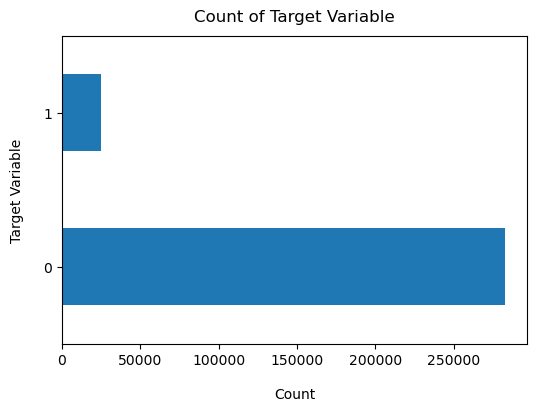

In [11]:
# TARGET feature
application_data["TARGET"].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable", y=1.02)
plt.show()


- The majority of the individuals in your dataset are non-defaulters, making up approximately 91.3% (282,686 out of 307,511) of the total population.
- Defaulters constitute about 8.7% (24,825 out of 307,511) of the population.
- There is a significant class imbalance, with non-defaulters vastly outnumbering defaulters.The relatively low percentage of defaulters suggests that most individuals are managing their loans well. 

#### Number of Applications and Target Values 

##### Gender

In [12]:
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'

gender_counts = application_data['CODE_GENDER'].value_counts()
print("Number of Applications by Gender:\n")
print(gender_counts)

gender_target_counts = application_data.groupby(['CODE_GENDER', 'TARGET']).size().unstack()
print("\nNumber of Applications by Gender and Target Value:\n")
print(gender_target_counts)

Number of Applications by Gender:

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

Number of Applications by Gender and Target Value:

TARGET            0      1
CODE_GENDER               
F            188282  14170
M             94404  10655


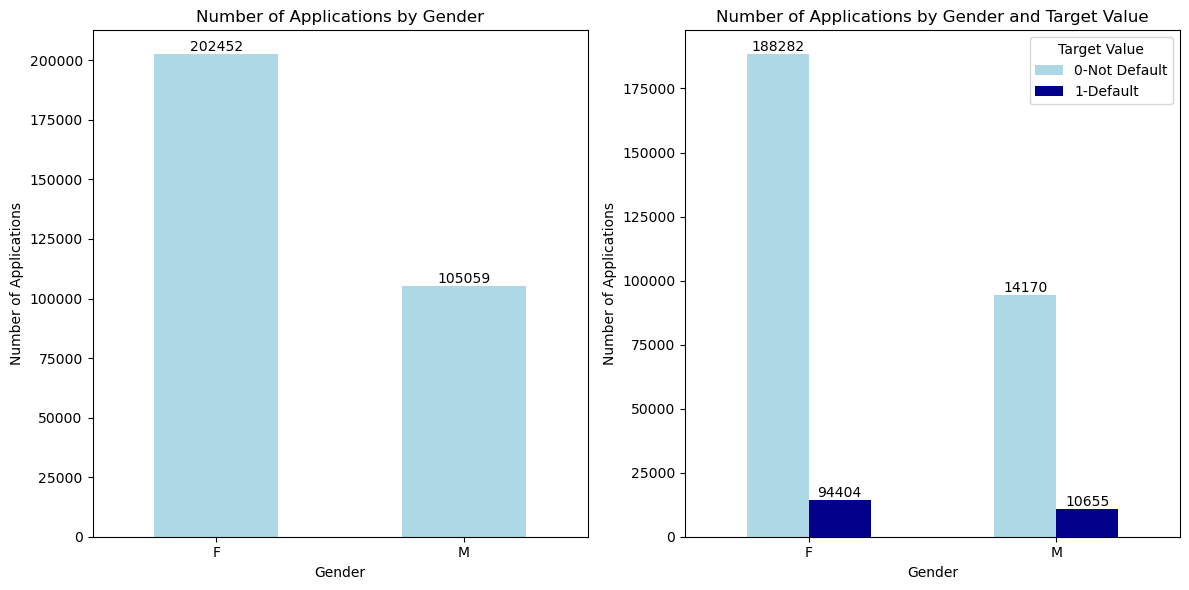

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender counts
gender_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Gender")
axes[0].tick_params(axis='x', rotation=0)
gender_counts_values = gender_counts.values
axes[0].bar_label(axes[0].containers[0], labels=gender_counts_values)

# gender and target value counts
gender_target_counts.plot(kind='bar', ax=axes[1],color=['lightblue','darkblue'])
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Gender and Target Value")
axes[1].tick_params(axis='x', rotation=0) 
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])  
gender_target_values = gender_target_counts.values.flatten()  
axes[1].bar_label(axes[1].containers[0], labels=gender_target_values[:len(gender_target_counts)])
axes[1].bar_label(axes[1].containers[1], labels=gender_target_values[len(gender_target_counts):])

plt.tight_layout()
plt.show()

- Females account for a larger share of applications (65.8%) compared to males (34.2%). This suggests that female applicants are more prevalent in the dataset.
- Females who are non-defaulters make up about 92.8% (188,282 out of 202,452) of female applications.
Males who are non-defaulters make up about 89.7% (94,404 out of 105,059) of male applications.
- The default rate among females is approximately 7.0% (14,170 out of 202,452), while for males, it’s around 10.1% (10,655 out of 105,059).This indicates that male applicants have a higher propensity to default compared to female applicants.


##### Contract Type

In [14]:
contract_type_counts = application_data['NAME_CONTRACT_TYPE'].value_counts()
print("Number of Applications by Contract Type:\n")
print(contract_type_counts)

contract_target_counts = (application_data.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack())
print("\nNumber of Applications by Contract Type and Target Value:\n")
print(contract_target_counts)


Number of Applications by Contract Type:

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

Number of Applications by Contract Type and Target Value:

TARGET                   0      1
NAME_CONTRACT_TYPE               
Cash loans          255011  23221
Revolving loans      27675   1604


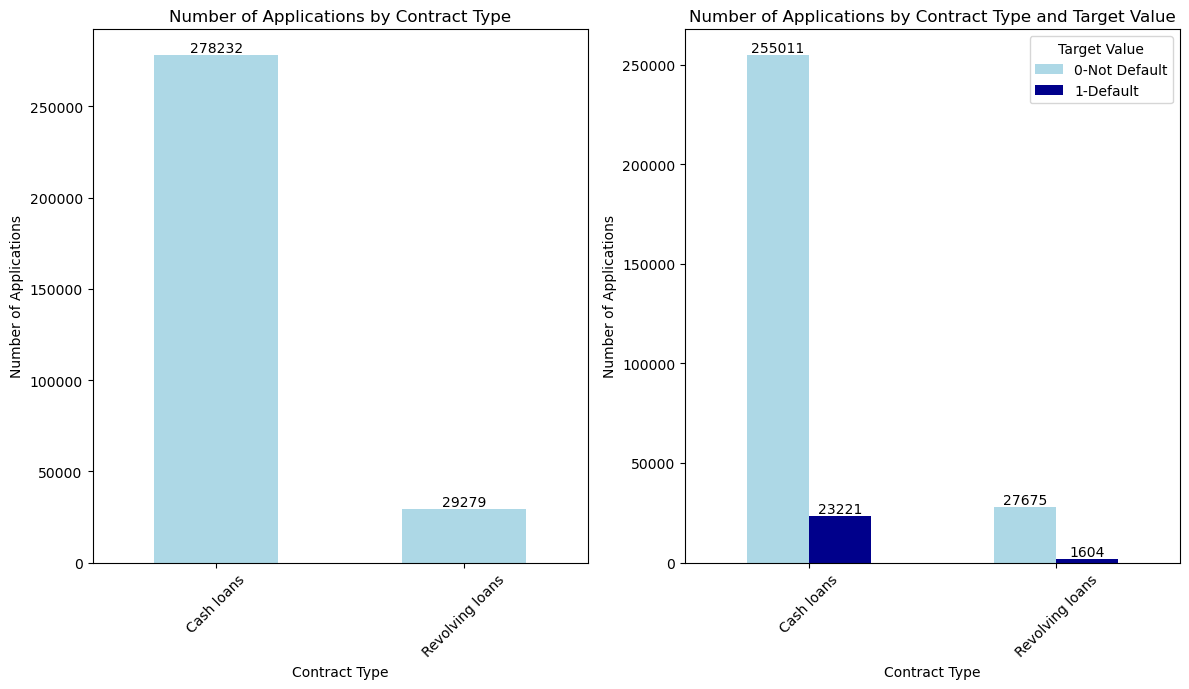

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
# Number of applications by contract type
contract_type_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Contract Type")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Contract Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0], labels=contract_type_counts.values)

# Number of applications by contract type and target value
contract_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Contract Type")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Contract Type and Target Value")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()


- Cash loans are the dominant type of loan, making up approximately 90.5% of total applications. Revolving loans constitute around 9.5%.
- Default Rates by Contract Type
The default rate for cash loans is approximately 8.4% (23,221 out of 278,232).
The default rate for revolving loans is significantly higher at around 5.5% (1,604 out of 29,279). This suggests that while fewer people apply for revolving loans, they have a lower overall default rate compared to cash loans.
- Non Default Rates by Contract Type
For cash loans, approximately 91.6% (255,011 out of 278,232) are non-defaulters.
For revolving loans, about 94.3% (27,675 out of 29,279) are non-defaulters. This indicates that both contract types have a high proportion of non-defaulters, but revolving loans show slightly better performance.

##### Income Type

In [16]:
income_type_counts = application_data['NAME_INCOME_TYPE'].value_counts()
print("Number of Applications by Income Type:\n")
print(income_type_counts)

income_target_counts = (application_data.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack())
print("\nNumber of Applications by Income Type and Target Value:\n")
print(income_target_counts)

Number of Applications by Income Type:

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

Number of Applications by Income Type and Target Value:

TARGET                       0        1
NAME_INCOME_TYPE                       
Businessman               10.0      NaN
Commercial associate   66257.0   5360.0
Maternity leave            3.0      2.0
Pensioner              52380.0   2982.0
State servant          20454.0   1249.0
Student                   18.0      NaN
Unemployed                14.0      8.0
Working               143550.0  15224.0


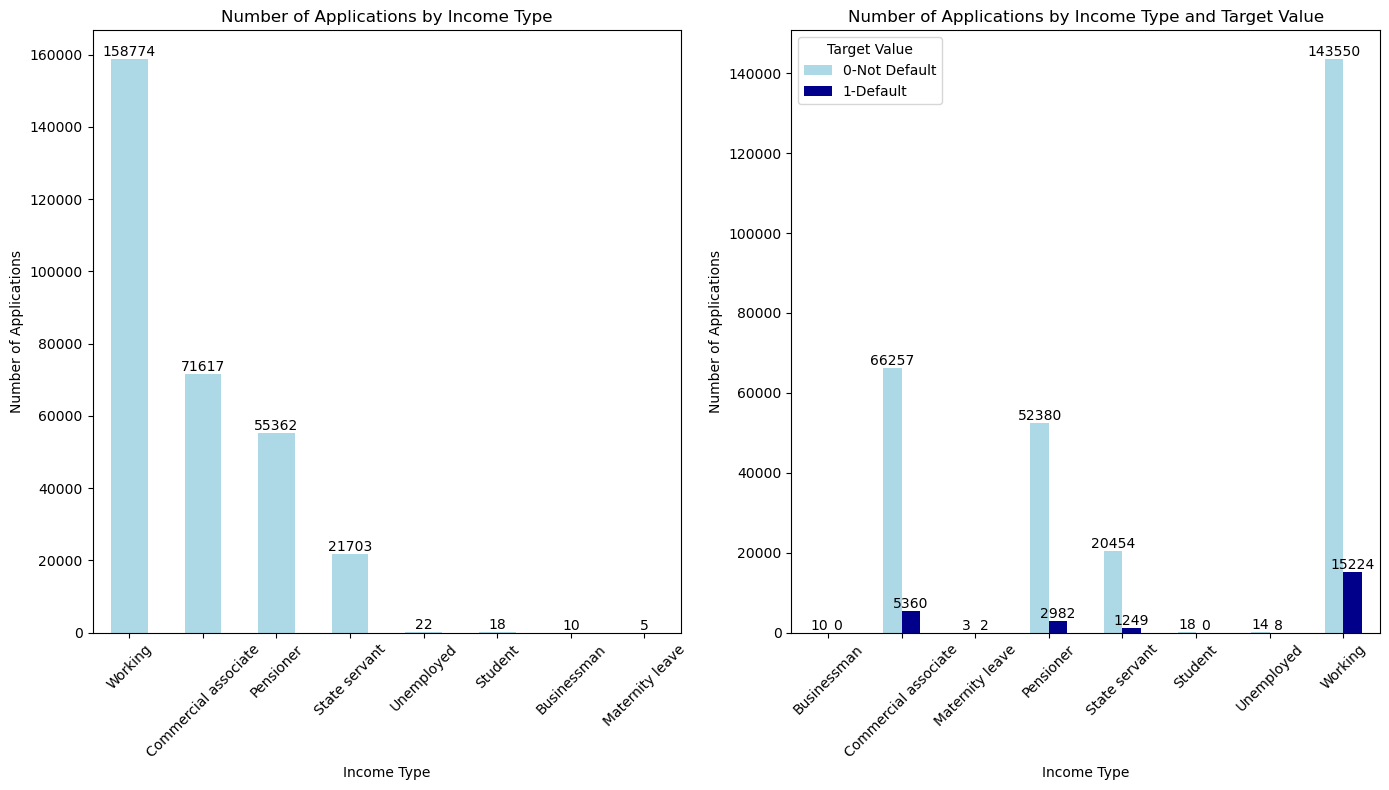

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Number of applications by income type
income_type_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Income Type")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Income Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0], labels=income_type_counts.values)

# Number of applications by income type and target value
income_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Income Type")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Income Type and Target Value")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- The majority of applications come from individuals classified as "Working" (approximately 50.5%), followed by "Commercial Associate" (about 23.5%), and "Pensioner" (around 18%). Other categories contribute very few applications.
- The highest default rates are among the "Unemployed"36.4% (8 out of 22) and "Maternity Leave"40% (2 out of 5). categories."Working" applicants, despite being the largest group, still show a notable default rate 9.6% (15,224 out of 158,774)
- The "Working" income type accounts for the largest share of non-defaulters, suggesting that individuals with stable employment are more likely to successfully manage their loan repayments. 

##### Occupation Type

In [18]:
occupation_type_counts = application_data['OCCUPATION_TYPE'].value_counts()
print("Number of Applications by Occupation Type:\n")
print(occupation_type_counts)

occupation_target_counts = (application_data.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack())
print("\nNumber of Applications by Occupation Type and Target Value:\n")
print(occupation_target_counts)

Number of Applications by Occupation Type:

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Number of Applications by Occupation Type and Target Value:

TARGET                     0     1
OCCUPATION_TYPE                   
Accountants             9339   474
Cleaning staff          4206   447
Cooking staff           5325   621
Core staff             25832  1738
Drivers                16496  2107
HR staff                 527    36
High skill tec

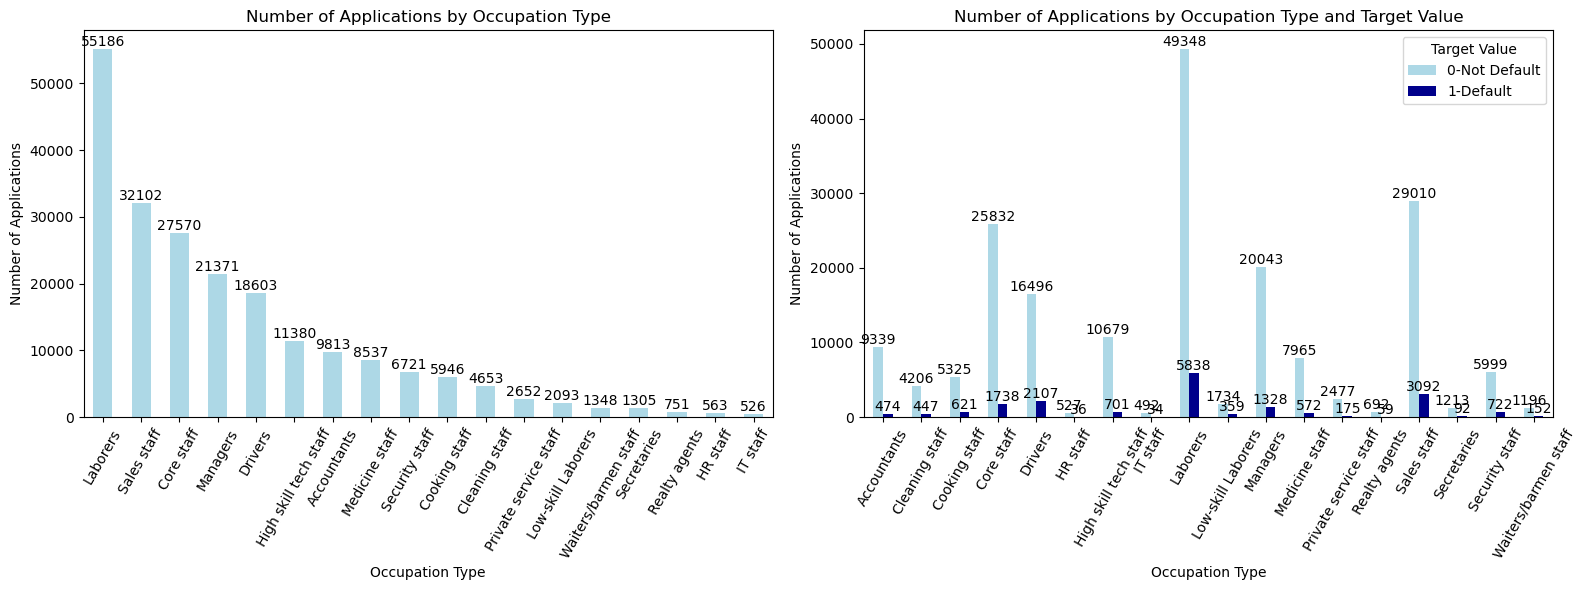

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Number of applications by occupation type
occupation_type_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Occupation Type")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Occupation Type")
axes[0].tick_params(axis='x', rotation=60)
axes[0].bar_label(axes[0].containers[0], labels=occupation_type_counts.values)

# Number of applications by occupation type and target value
occupation_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Occupation Type")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Occupation Type and Target Value")
axes[1].tick_params(axis='x', rotation=60)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- The dataset reveals a diverse range of loan applications across various occupation types, with Laborers being the most prominent group, representing about 22.4% of total applications. Other significant segments include Sales Staff and Core Staff, indicating strong interest in loans among lower and middle-skilled workers.
While Managers also show notable application numbers, high-skill roles like IT Staff and HR Staff are less represented, possibly reflecting their more stable financial situations.
- Laborers have the highest absolute number of defaults (5,838) and a notable default rate of 10.6%.Both Sales Staff (9.6% default rate) and Drivers (11.3% default rate) also show substantial default rates, indicating financial instability.
Core Staff (6.3%) and High Skill Tech Staff (6.2%) demonstrate moderate default rates. These rates suggest that financial education could still play a role in improving repayment behavior.
Accountants show the lowest default rate at 4.8%, indicating that this group is more financially stable.

##### Family Status

In [20]:
family_status_counts = application_data['NAME_FAMILY_STATUS'].value_counts()
print("Number of Applications by Family Status:\n")
print(family_status_counts)

family_status_target_counts = application_data.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack()
print("\nNumber of Applications by Family Status and Target Value:\n")
print(family_status_target_counts)

Number of Applications by Family Status:

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Number of Applications by Family Status and Target Value:

TARGET                       0        1
NAME_FAMILY_STATUS                     
Civil marriage         26814.0   2961.0
Married               181582.0  14850.0
Separated              18150.0   1620.0
Single / not married   40987.0   4457.0
Unknown                    2.0      NaN
Widow                  15151.0    937.0


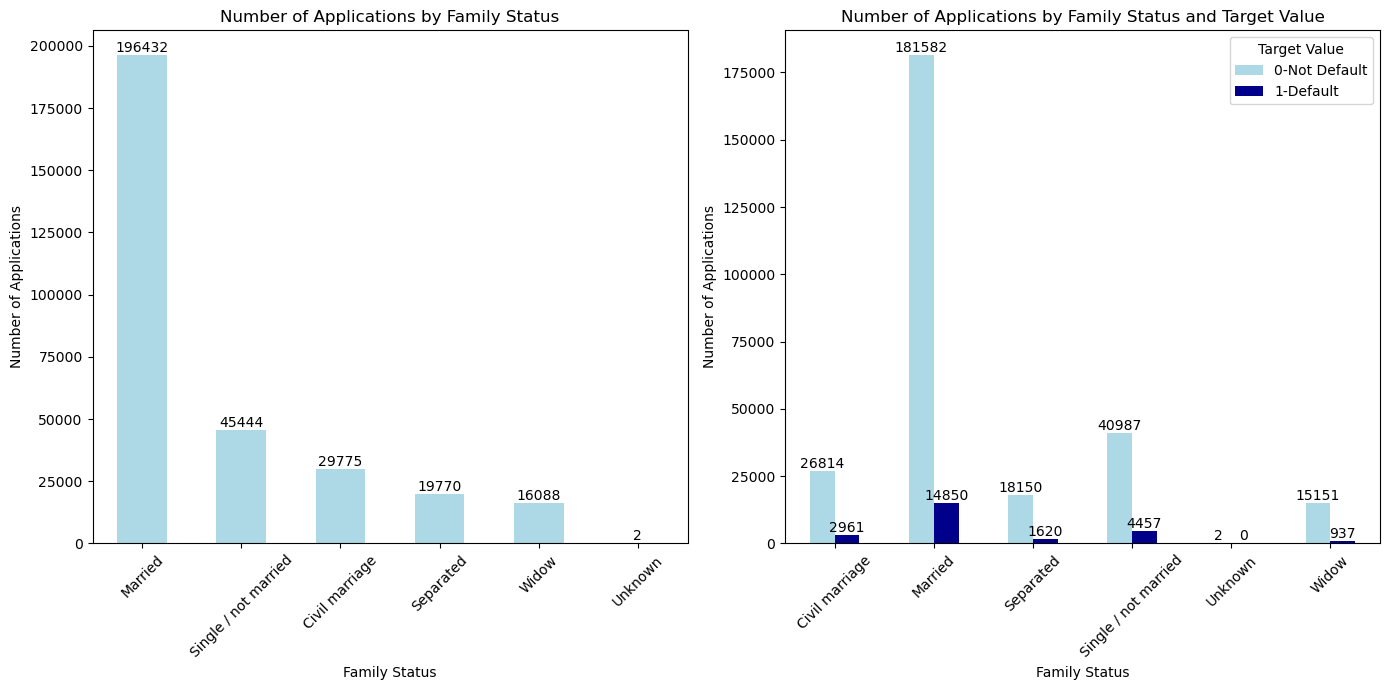

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Number of applications by family status
family_status_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Family Status")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Family Status")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0], labels=family_status_counts.values)

# Number of applications by family status and target value
family_status_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Family Status")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Family Status and Target Value")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- Married individuals account for the largest share of applications (196,432), representing about 62.5% of total applications.
- Civil Marriage applicants show a default rate of 9.9%, and Separated individuals face an 8.2% default rate, suggesting challenges in financial stability across these groups. Widows, with 16,088 applications, have a lower default rate of 5.8%, indicating effective financial management despite their circumstances.
-  Single / Not Married applicants, while making up a significant segment with 45,444 applications, have a higher default rate of 9.0%, reflecting greater financial vulnerability. Married applicants exhibiting a low default rate of 7.6%, indicating their financial reliability. 

##### Housing Type

In [22]:

housing_type_counts = application_data['NAME_HOUSING_TYPE'].value_counts()
print("Number of Applications by Housing Type:\n")
print(housing_type_counts)

housing_target_counts = (application_data.groupby(['NAME_HOUSING_TYPE', 'TARGET']).size().unstack())
print("\nNumber of Applications by Housing Type and Target Value:\n")
print(housing_target_counts)


Number of Applications by Housing Type:

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

Number of Applications by Housing Type and Target Value:

TARGET                    0      1
NAME_HOUSING_TYPE                 
Co-op apartment        1033     89
House / apartment    251596  21272
Municipal apartment   10228    955
Office apartment       2445    172
Rented apartment       4280    601
With parents          13104   1736


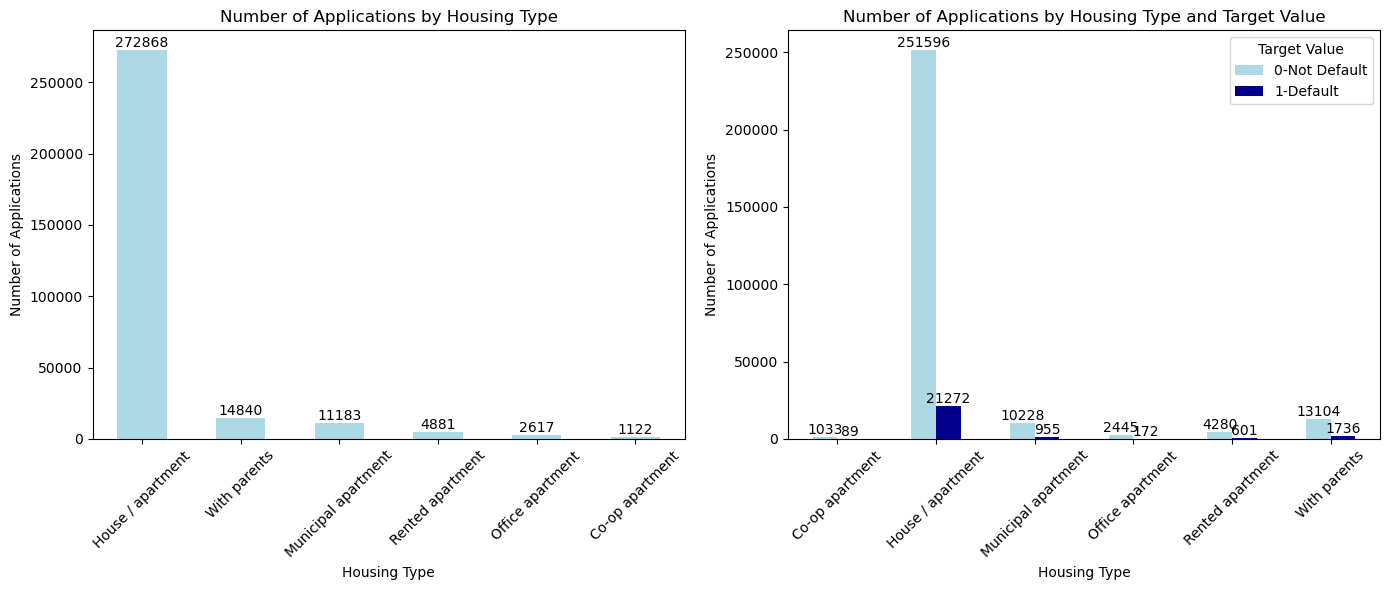

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 

# Housing type counts
housing_type_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Housing Type")
axes[0].set_ylabel("Number of Applications")
axes[0].set_title("Number of Applications by Housing Type")
axes[0].tick_params(axis='x', rotation=45)  
axes[0].bar_label(axes[0].containers[0], labels=housing_type_counts.values)

# Housing type and target value counts
housing_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Housing Type")
axes[1].set_ylabel("Number of Applications")
axes[1].set_title("Number of Applications by Housing Type and Target Value")
axes[1].tick_params(axis='x', rotation=45)  
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- The data on loan applications shows that the majority, 272,868 applications (about 70%), are from individuals in stable housing situations, highlighting a strong link between stable housing and loan-seeking behavior.
- Rented apartments account for 4,881 applications (1.3%), indicating that renting is less common among loan seekers. Office apartments have 2,617 applications (0.7%), showing they are a rare choice, while co-op apartments, with just 1,122 applications (0.3%), attract a specific demographic.
- Among house/apartment applicants, the default rate is 7.8%, indicating that those in stable housing are generally reliable borrowers.In contrast, individuals living with parents have a higher default rate of 11.7% (1,736 defaulters), reflecting potential financial instability.
- Renters experience the highest default rate at 12.3% (601 defaulters), suggesting significant financial strain. 

##### Age

In [24]:
(application_data['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean        -44.433090
std          11.954493
min         -70.000000
25%         -54.000000
50%         -44.000000
75%         -35.000000
max         -21.000000
Name: DAYS_BIRTH, dtype: float64

In [25]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])  
application_data['YEARS_BIRTH'] = application_data['DAYS_BIRTH'] / 365 

age_bins = np.linspace(20, 70, num=11) 
age_labels = [f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins) - 1)]

application_data['AGE_RANGE'] = pd.cut(application_data['YEARS_BIRTH'], bins=age_bins, labels=age_labels, include_lowest=True)

print(application_data[['DAYS_BIRTH', 'YEARS_BIRTH', 'AGE_RANGE']])

        DAYS_BIRTH  YEARS_BIRTH AGE_RANGE
0             9461    25.920548     25-30
1            16765    45.931507     45-50
2            19046    52.180822     50-55
3            19005    52.068493     50-55
4            19932    54.608219     50-55
...            ...          ...       ...
307506        9327    25.553425     25-30
307507       20775    56.917808     55-60
307508       14966    41.002740     40-45
307509       11961    32.769863     30-35
307510       16856    46.180822     45-50

[307511 rows x 3 columns]


In [26]:
#age range
age_range_counts = application_data['AGE_RANGE'].value_counts().sort_index()
print("Number of Applications by Age Range:\n")
print(age_range_counts)

age_target_counts = (application_data.groupby(['AGE_RANGE', 'TARGET']).size().unstack(fill_value=0)) 
print("\nNumber of Applications by Age Range and Target Value:\n")
print(age_target_counts)

Number of Applications by Age Range:

AGE_RANGE
20-25    12159
25-30    32862
30-35    39440
35-40    42868
40-45    41406
45-50    35135
50-55    34942
55-60    33120
60-65    27476
65-70     8103
Name: count, dtype: int64

Number of Applications by Age Range and Target Value:

TARGET         0     1
AGE_RANGE             
20-25      10663  1496
25-30      29200  3662
30-35      35385  4055
35-40      39035  3833
40-45      38156  3250
45-50      32529  2606
50-55      32602  2340
55-60      31288  1832
60-65      26027  1449
65-70       7801   302


C:\Users\hp\AppData\Local\Temp\ipykernel_14864\1312501531.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target_counts = (application_data.groupby(['AGE_RANGE', 'TARGET']).size().unstack(fill_value=0))


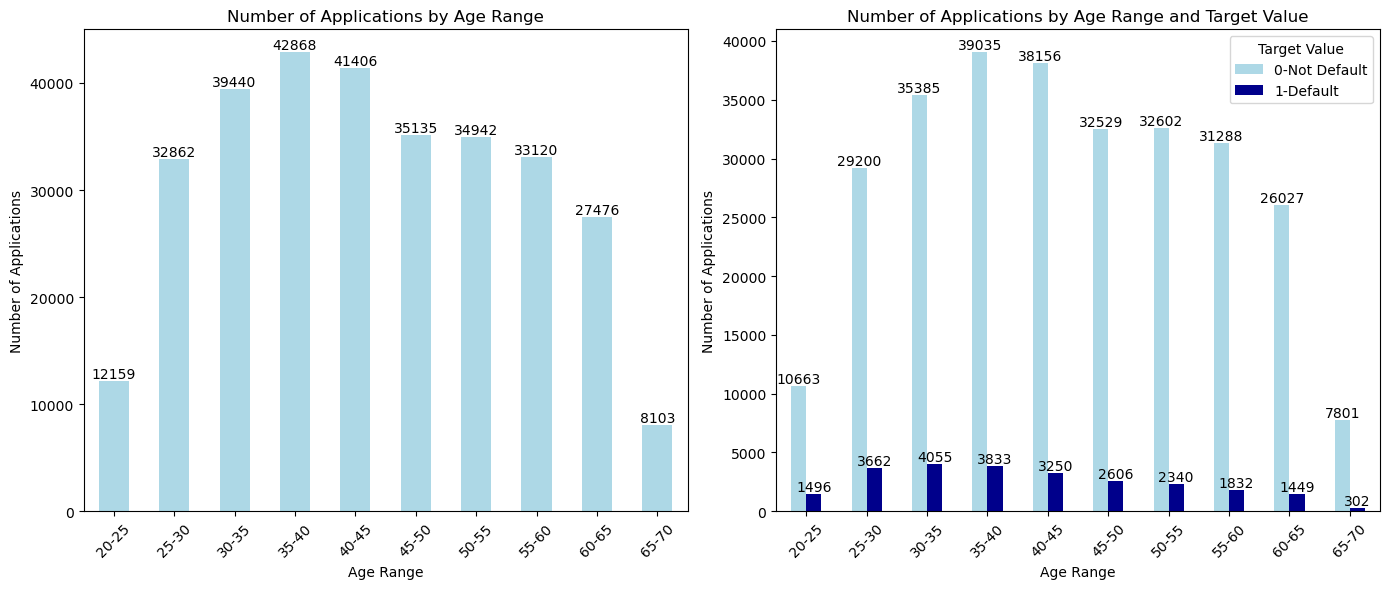

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Age range counts
age_range_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Age Range", fontsize=10)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].set_title("Number of Applications by Age Range", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(axes[0].containers[0], labels=age_range_counts.values)  # Show values above bars

# Age range and target value counts
age_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Age Range", fontsize=10)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].set_title("Number of Applications by Age Range and Target Value", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- The 35-40 age group leads with 42,868 applications, about 16.2% of the total, The 30-35 age group follows closely with 39,440 applications (15.0%), indicating financial activity related to career and family investments.The 25-30 age group has 32,862 applications, making up around 12.4% of total applications. 
- The 20-25 age group has the highest default rate at 12.3%, suggesting that younger borrowers may struggle with loan repayment due to limited financial experience, unstable income, or other economic pressures.
- Default rates decrease significantly with age, reaching 3.7% in the 65-70 age group. This trend indicates that older individuals tend to be more financially stable and reliable borrowers

##### Car Ownership

In [28]:
car_ownership_counts = application_data['FLAG_OWN_CAR'].value_counts()
print("Number of Applications by Car Ownership:\n")
print(car_ownership_counts)

car_target_counts = application_data.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack()
print("\nNumber of Applications by Car Ownership and Target Value:\n")
print(car_target_counts)

Number of Applications by Car Ownership:

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Number of Applications by Car Ownership and Target Value:

TARGET             0      1
FLAG_OWN_CAR               
N             185675  17249
Y              97011   7576


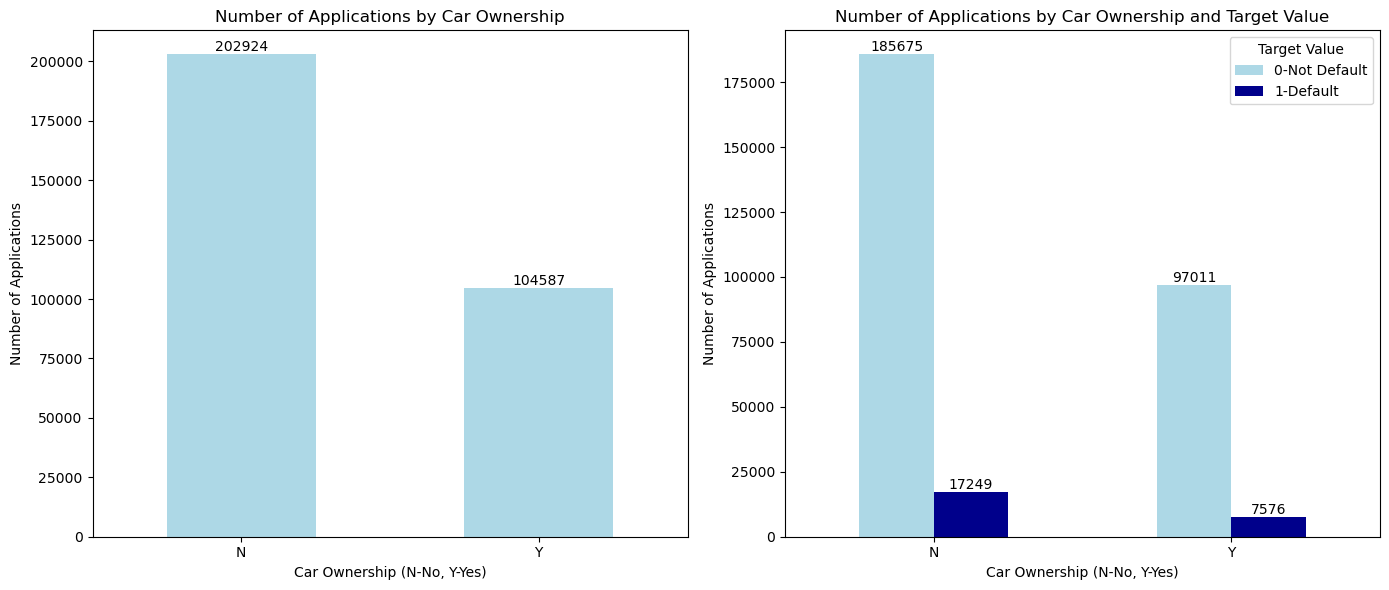

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Number of applications by car ownership
car_ownership_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Car Ownership (N-No, Y-Yes)", fontsize=10)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].set_title("Number of Applications by Car Ownership", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].bar_label(axes[0].containers[0], labels=car_ownership_counts.values)

# Number of applications by car ownership and target value
car_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Car Ownership (N-No, Y-Yes)", fontsize=10)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].set_title("Number of Applications by Car Ownership and Target Value", fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()



- The "No Car" group comprises 202,924 applications, representing about 66% of the total. In contrast, the "Own Car" group has 104,587 applications, accounting for around 34% of the total. Car ownership suggests greater financial stability and the capacity to invest in assets.
- The default rate for those without a car is 8.5%, while for car owners, it is lower at 7.2%. This suggests that car owners might have more financial stability and reliability in loan repayment, likely due to greater access to resources and assets.

In [30]:
realty_ownership_counts = application_data['FLAG_OWN_REALTY'].value_counts()
print("Number of Applications by Realty Ownership:\n")
print(realty_ownership_counts)

realty_target_counts = application_data.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().unstack()
print("\nNumber of Applications by Realty Ownership and Target Value:\n")
print(realty_target_counts)

Number of Applications by Realty Ownership:

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

Number of Applications by Realty Ownership and Target Value:

TARGET                0      1
FLAG_OWN_REALTY               
N                 86357   7842
Y                196329  16983


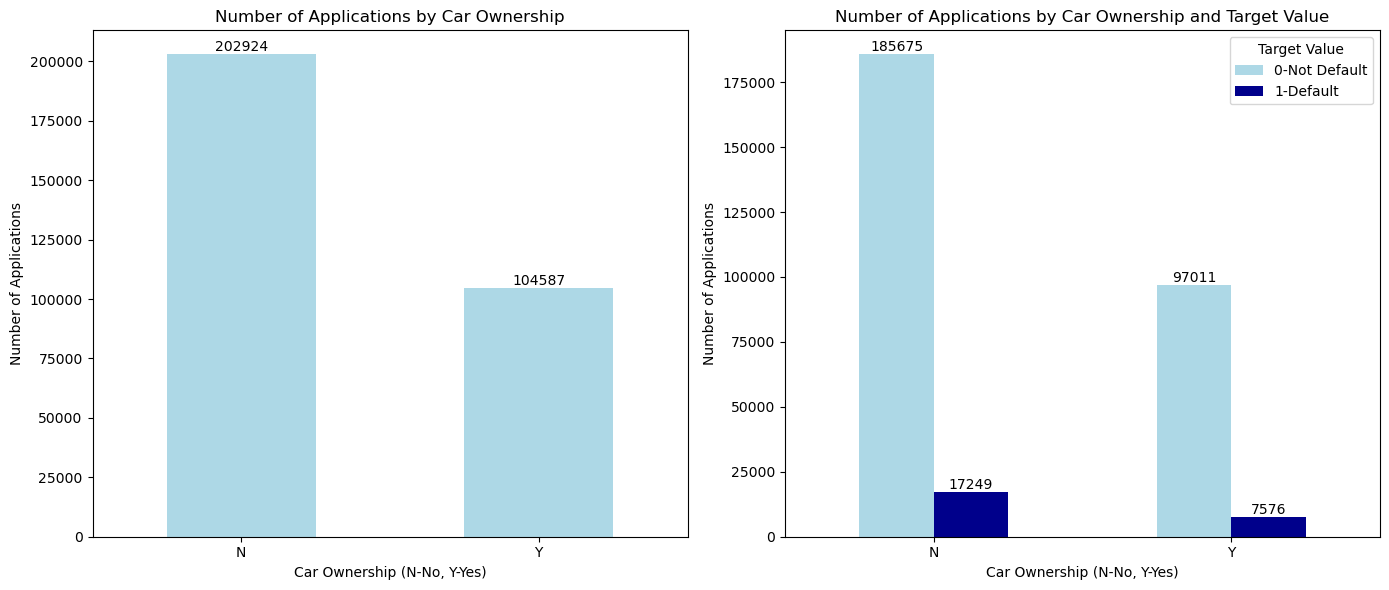

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Number of applications by car ownership
car_ownership_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_xlabel("Car Ownership (N-No, Y-Yes)", fontsize=10)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].set_title("Number of Applications by Car Ownership", fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].bar_label(axes[0].containers[0], labels=car_ownership_counts.values)

# Number of applications by car ownership and target value
car_target_counts.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_xlabel("Car Ownership (N-No, Y-Yes)", fontsize=10)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].set_title("Number of Applications by Car Ownership and Target Value", fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

- The "Own Realty" group has 213,312 applications, representing approximately 69% of the total, which often correlates with financial stability and the ability to handle significant financial commitments. In contrast, the "No Realty" group comprises 94,199 applications (about 31%), suggesting that those without real estate ownership may be younger or still in the earlier stages of their financial journey
- The default rate for applicants without realty is 8.3%, which is slightly higher than the 7.9% rate for those who own realty. This suggests that realty ownership correlates with slightly lower financial risk, as homeowners are often more reliable borrowers due to their established financial footing.

#### Hourly Applications

In [32]:
hourly_distribution = application_data['HOUR_APPR_PROCESS_START'].value_counts().sort_index()
hourly_percentage = (hourly_distribution / hourly_distribution.sum()) * 100
hourly_percentage = hourly_percentage.round(2).astype(str) + '%'
hourly_summary = pd.DataFrame({
    'Count': hourly_distribution,
    'Percentage': hourly_percentage
})

print("Hourly Application Distribution and Percentage:\n")
print(hourly_summary)

Hourly Application Distribution and Percentage:

                         Count Percentage
HOUR_APPR_PROCESS_START                  
0                           40      0.01%
1                           86      0.03%
2                          305       0.1%
3                         1230       0.4%
4                         2090      0.68%
5                         3638      1.18%
6                         5842       1.9%
7                         9131      2.97%
8                        15127      4.92%
9                        27384      8.91%
10                       37722     12.27%
11                       37229     12.11%
12                       34233     11.13%
13                       30959     10.07%
14                       27682       9.0%
15                       24839      8.08%
16                       20385      6.63%
17                       14900      4.85%
18                        9049      2.94%
19                        3848      1.25%
20                        1

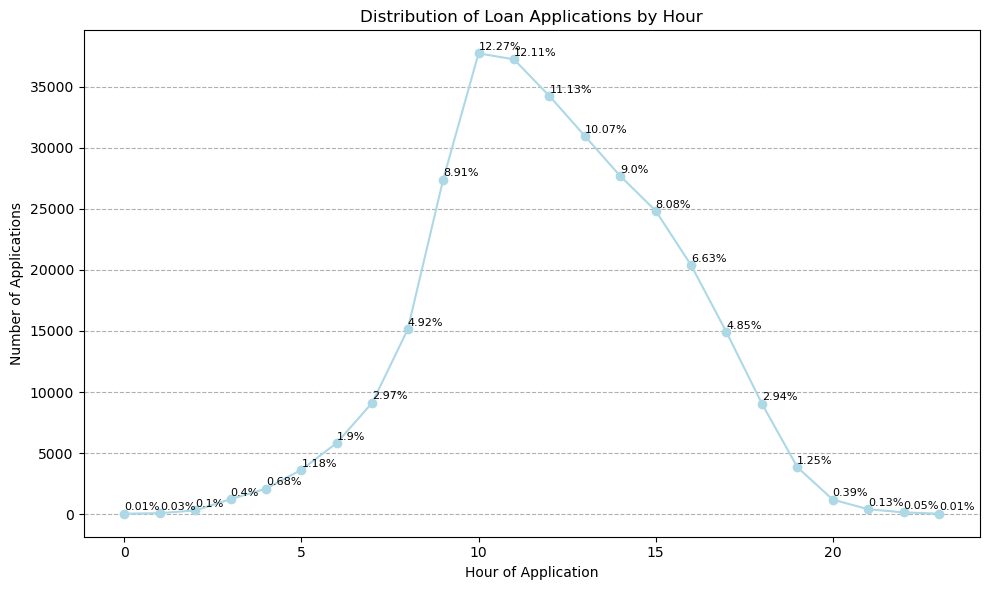

In [33]:
plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='line', marker='o', color='lightblue')
plt.title('Distribution of Loan Applications by Hour')
plt.xlabel('Hour of Application')
plt.ylabel('Number of Applications')
plt.grid(axis='y', linestyle='--')

for index, value in enumerate(hourly_distribution):
    plt.text(index, value + 100, f'{hourly_percentage[index]}', ha='left', va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

- Application volume exhibits a clear peak between 10 AM and 1 PM, with the highest activity at 10 AM (37,722 applications, 12.27%) and 11 AM (37,229 applications, 12.11%).
-  Applications begin to rise significantly from 8 AM, reaching 15,127 at that hour (4.92%), indicating a preference for applying early in the day. After the peak around 11 AM, application numbers gradually decline.
-  Afternoon activity remains steady but decreases further into the evening, with only 1,196 applications at 8 PM (0.39%) and just 41 at 11 PM (0.01%).

#### Number of Applications by Weekdays

In [34]:
weekday_distribution = application_data['WEEKDAY_APPR_PROCESS_START'].value_counts().sort_index()
weekday_percentage = (weekday_distribution / weekday_distribution.sum()) * 100
weekday_percentage = weekday_percentage.round(2)
weekday_summary = pd.DataFrame({
    'Count': weekday_distribution,
    'Percentage': weekday_percentage
})

print("\nHourly Application Summary:\n")
print(weekday_summary)


Hourly Application Summary:

                            Count  Percentage
WEEKDAY_APPR_PROCESS_START                   
FRIDAY                      50338       16.37
MONDAY                      50714       16.49
SATURDAY                    33852       11.01
SUNDAY                      16181        5.26
THURSDAY                    50591       16.45
TUESDAY                     53901       17.53
WEDNESDAY                   51934       16.89


C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3258203962.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 10, f'{weekday_percentage[index]:.2f}%', ha='center', va='bottom', fontsize=9)


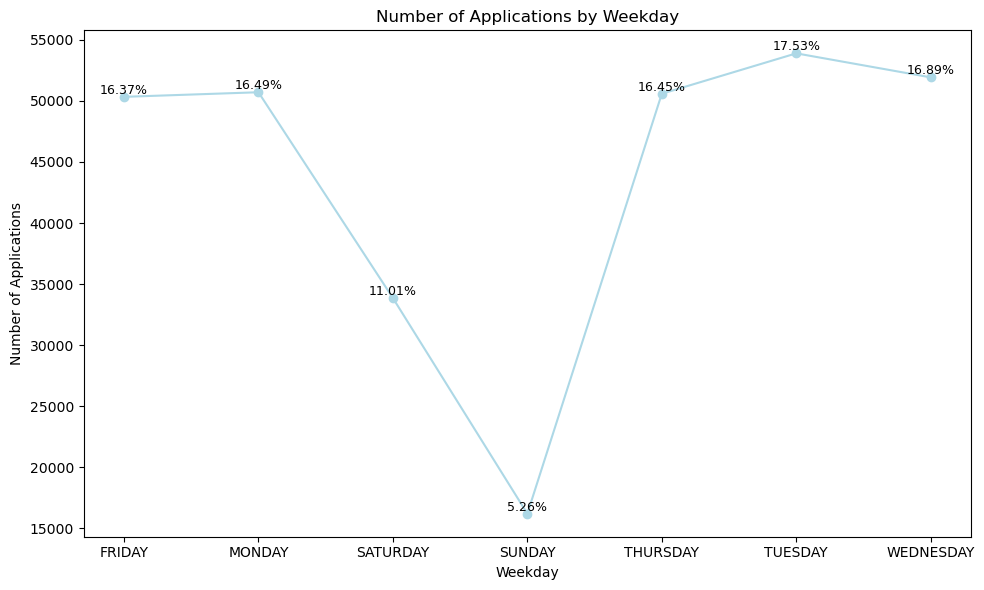

In [35]:
plt.figure(figsize=(10, 6))
weekday_distribution.plot(kind='line', marker='o', color='lightblue')
plt.title('Number of Applications by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)

for index, value in enumerate(weekday_distribution):
    plt.text(index, value + 10, f'{weekday_percentage[index]:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

- Tuesday is the peak day for loan applications, with 53,901 submissions (17.53%), indicating that borrowers are most active early in the week,Midweek shows steady application counts, with Wednesday at 51,934 (16.89%) and Thursday at 50,591 (16.45%), suggesting that individuals are actively assessing their financial situations.
- However, application volume drops over the weekend, with Saturday at 33,852 (11.01%) and Sunday at just 16,181 (5.26%), indicating that potential borrowers are less engaged with financial decisions during this time.

#### Applications by Income and Target Rate

In [36]:
(application_data['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
application_data['INCOME_GROUP'] = pd.cut(application_data['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )


In [38]:
income_group_counts = application_data['INCOME_GROUP'].value_counts().sort_index()
print("Number of Applications by Income Group:\n")
print(income_group_counts)

income_target_counts = application_data.groupby(['INCOME_GROUP', 'TARGET']).size().unstack()
print("\nNumber of Applications by Income Group and Target Value:\n")
print(income_target_counts)

Number of Applications by Income Group:

INCOME_GROUP
Upto 1L       63698
1-2L         155898
2-5L          85213
5-10L          2452
10-20L          206
20-50L           39
50L above         4
Name: count, dtype: int64

Number of Applications by Income Group and Target Value:

TARGET             0      1
INCOME_GROUP               
Upto 1L        58473   5225
1-2L          142572  13326
2-5L           79085   6128
5-10L           2319    133
10-20L           195     11
20-50L            38      1
50L above          4      0


C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3463947329.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_target_counts = application_data.groupby(['INCOME_GROUP', 'TARGET']).size().unstack()


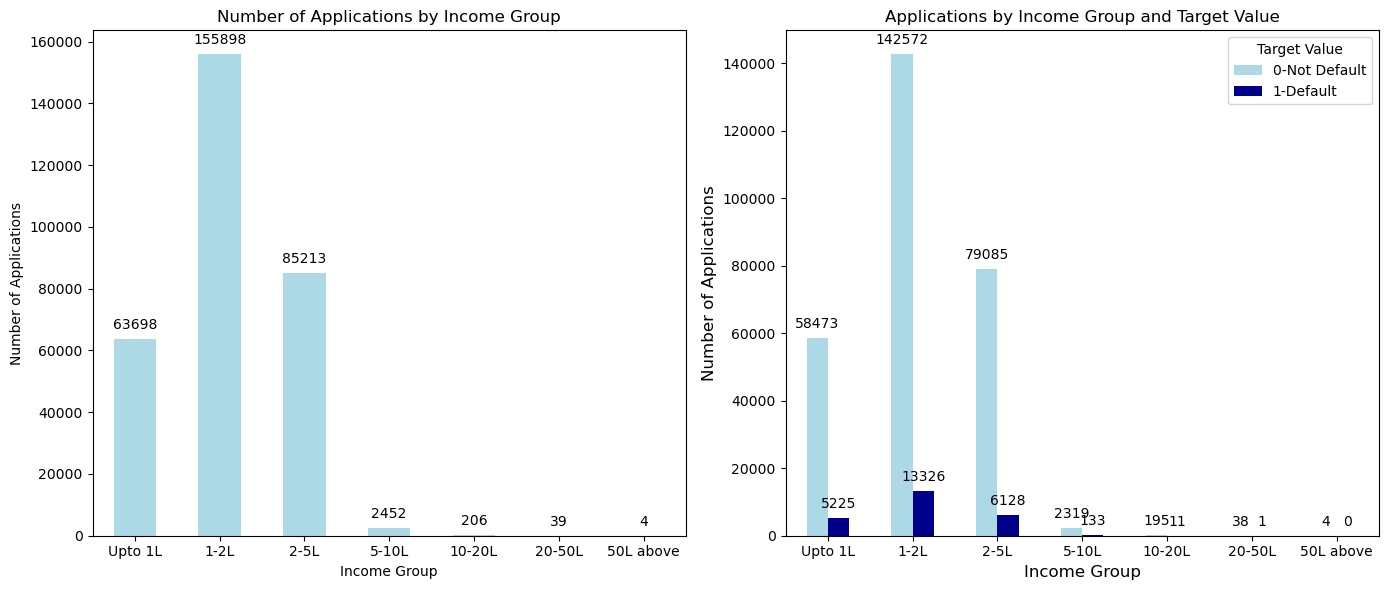

In [39]:
plt.figure(figsize=(14, 6))

# Total applications by income group
ax1 = plt.subplot(1, 2, 1)  
bars1 = income_group_counts.plot(kind='bar', color='lightblue', ax=ax1)
plt.title('Number of Applications by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Applications')
plt.xticks(rotation=0)
ax1.bar_label(bars1.containers[0], padding=5)

# Number of applications by income group and target value
ax2 = plt.subplot(1, 2, 2)
bars2 = income_target_counts.plot(kind='bar', color=['lightblue', 'darkblue'], ax=ax2)
ax2.set_title('Applications by Income Group and Target Value', fontsize=12)
ax2.set_xlabel('Income Group', fontsize=12)
ax2.set_ylabel('Number of Applications', fontsize=12)
ax2.tick_params(axis='x', rotation=0)
ax2.legend(title='Target Value', labels=['0-Not Default', '1-Default'], fontsize=10)
for container in bars2.containers:
    ax2.bar_label(container, padding=5, fontsize=10)


plt.tight_layout()
plt.show()

- The application distribution reveals significant trends across various income brackets. The "Upto 1 lakh" group has 63,698 applications, making up about 17.3% of the total, reflecting engagement from lower-income individuals. The "1-2 lakh" group leads with 155,898 applications, representing 42.5%, indicating strong activity for major purchases or investments.
- However, engagement drops sharply in higher income brackets, with only 0.7% of applications (2,452) from the "5-10 lakh" group, and even fewer in the "10-20 lakh" (206 applications), "20-50 lakh" (39 applications), and "50 lakh and above" (4 applications) categories.
- This data suggests that most loan applicants are concentrated in the lower to middle-income ranges, with significantly fewer in the higher income brackets.
-  In the "Upto 1 lakh" group, there are 5,225 defaulters (approximately 8.2%), indicating a higher likelihood of financial instability among lower-income individuals. The "1-2 lakh" group has 13,326 defaulters (about 8.5%), showing a slight increase in default risk as income rises but still reflecting significant financial strain.
-  In the "2-5 lakh" category, the default rate decreases to 6,128 (approximately 7.2%), suggesting that as income increases, borrowers are generally better at managing their financial commitments. The "5-10 lakh" group has only 133 defaulters (about 5.4%), indicating that higher-income individuals are more reliable in meeting their loan obligations. 

#### Applications by Credit Amount and Target Rate

In [40]:
(application_data['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

In [41]:
bins_credit = [0, 100000, 200000, 500000, 1000000, 2000000, 4000000, 10000000]
labels_credit = ['Upto 1L', '1-2L', '2-5L', '5-10L', '10-20L', '20-40L', '50L Above']
application_data['CREDIT_GROUP'] = pd.cut(application_data['AMT_CREDIT'], bins=bins_credit, labels=labels_credit)


In [42]:
credit_group_counts = application_data['CREDIT_GROUP'].value_counts().sort_index()
print("Number of Applications Credit Group:\n")
print(credit_group_counts)

credit_target_counts = (application_data.groupby(['CREDIT_GROUP', 'TARGET']).size().unstack(fill_value=0))
print("\nNumber of Applications by Credit Value Range and Target Value:\n")
print(credit_target_counts)

Number of Applications Credit Group:

CREDIT_GROUP
Upto 1L        6004
1-2L          30140
2-5L         113189
5-10L        108193
10-20L        47956
20-40L         2019
50L Above        10
Name: count, dtype: int64

Number of Applications by Credit Value Range and Target Value:

TARGET             0      1
CREDIT_GROUP               
Upto 1L         5673    331
1-2L           27981   2159
2-5L          103074  10115
5-10L          98905   9288
10-20L         45090   2866
20-40L          1954     65
50L Above          9      1


C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3423277029.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_target_counts = (application_data.groupby(['CREDIT_GROUP', 'TARGET']).size().unstack(fill_value=0))


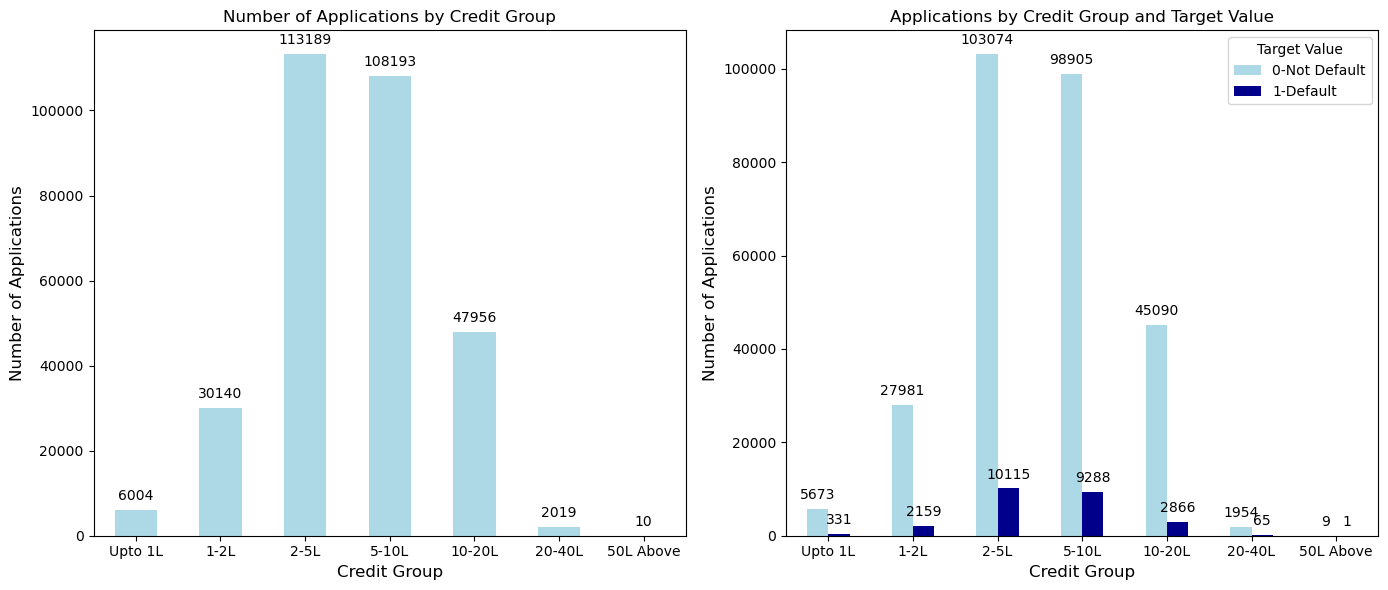

In [43]:
plt.figure(figsize=(14, 6))

# Total applications by credit group
ax1 = plt.subplot(1, 2, 1) 
bars1 = credit_group_counts.plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_title('Number of Applications by Credit Group', fontsize=12)
ax1.set_xlabel('Credit Group', fontsize=12)
ax1.set_ylabel('Number of Applications', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
ax1.bar_label(bars1.containers[0], padding=5, fontsize=10)

# Applications by credit group and target value
ax2 = plt.subplot(1, 2, 2) 
bars2 = credit_target_counts.plot(kind='bar', color=['lightblue', 'darkblue'], ax=ax2)
ax2.set_title('Applications by Credit Group and Target Value', fontsize=12)
ax2.set_xlabel('Credit Group', fontsize=12)
ax2.set_ylabel('Number of Applications', fontsize=12)
ax2.tick_params(axis='x', rotation=0)
ax2.legend(title='Target Value', labels=['0-Not Default', '1-Default'], fontsize=10)
for container in bars2.containers:
    ax2.bar_label(container, padding=5, fontsize=10)


plt.tight_layout()
plt.show()

- The 2-5 lakh credit group has the highest application volume, suggesting a significant demand for loans within this bracket, likely for major purchases or investments.
- While lower credit groups (Upto 1 lakh and 1-2 lakh) have lower default rates, the trend shows an increase in default rates as credit amounts rise, peaking at 8.9% for the 2-5 lakh group before dropping to 3.2% for the 20-40 lakh group.
- The very high credit groups (20 lakh and above) attract significantly fewer applicants, indicating that individuals may prefer smaller, more manageable loan amounts, or that those needing large loans have alternative financing sources.

#### Applications by Annuity Amount and Target Rate

In [44]:
(application_data['AMT_ANNUITY']).describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [45]:
bins = [0, 5000, 15000, 25000, 35000, 50000, 100000, 260000] 
labels = ['Upto 5K', '5K-15K', '15K-25K', '25K-35K', '35K-50K', '50K-100K', 'Above 100K']

application_data['ANNUITY_GROUP'] = pd.cut(application_data['AMT_ANNUITY'], bins=bins, labels=labels, right=False)

In [46]:
annuity_group_counts = application_data['ANNUITY_GROUP'].value_counts().sort_index()
print("Number of Applications Annuity Group:\n")
print(annuity_group_counts)

annuity_target_counts = (application_data.groupby(['ANNUITY_GROUP', 'TARGET']).size().unstack(fill_value=0))
print("\nNumber of Applications by Annuity Value Range and Target Value:\n")
print(annuity_target_counts)

Number of Applications Annuity Group:

ANNUITY_GROUP
Upto 5K        1141
5K-15K        62539
15K-25K       91187
25K-35K       77772
35K-50K       53563
50K-100K      20792
Above 100K      505
Name: count, dtype: int64

Number of Applications by Annuity Value Range and Target Value:

TARGET             0     1
ANNUITY_GROUP             
Upto 5K         1078    63
5K-15K         58155  4384
15K-25K        83397  7790
25K-35K        70578  7194
35K-50K        49392  4171
50K-100K       19579  1213
Above 100K       495    10


C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3882930906.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annuity_target_counts = (application_data.groupby(['ANNUITY_GROUP', 'TARGET']).size().unstack(fill_value=0))


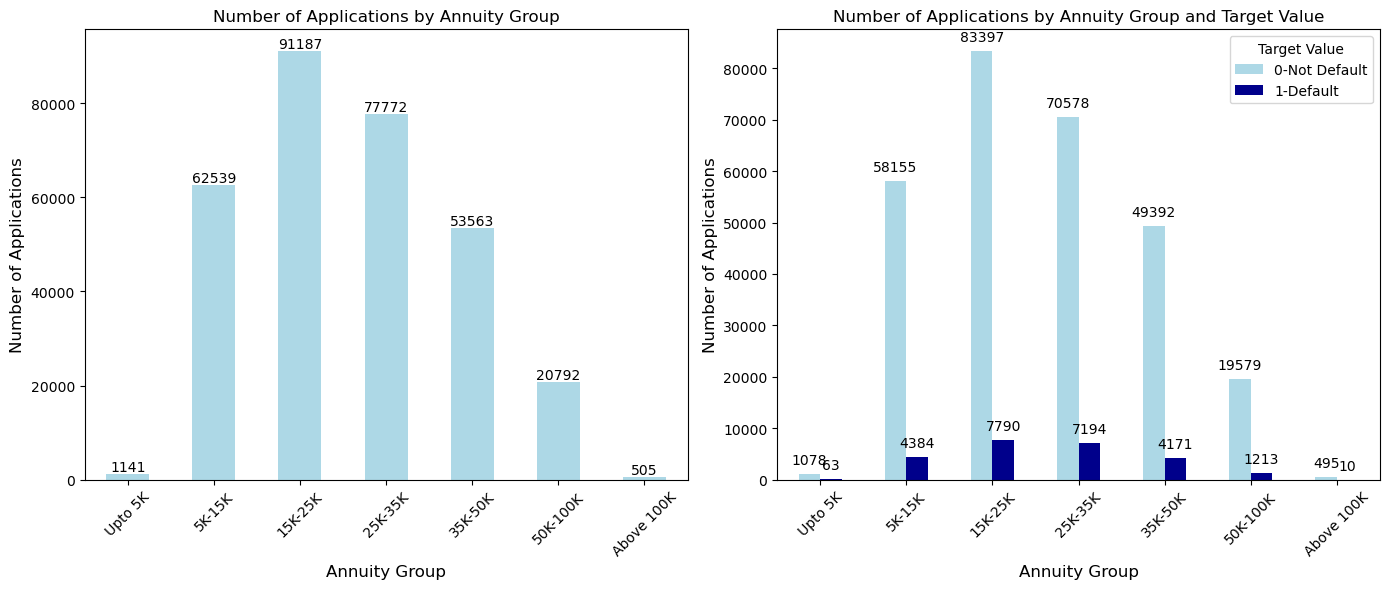

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total applications by annuity group
annuity_group_counts.plot(kind='bar', color='lightblue', ax=axes[0])
axes[0].set_title('Number of Applications by Annuity Group', fontsize=12)
axes[0].set_xlabel('Annuity Group', fontsize=12)
axes[0].set_ylabel('Number of Applications', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for index, value in enumerate(annuity_group_counts):
    axes[0].text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Applications by annuity group and target value
annuity_target_counts.plot(kind='bar', color=['lightblue', 'darkblue'], ax=axes[1])
axes[1].set_title('Number of Applications by Annuity Group and Target Value', fontsize=12)
axes[1].set_xlabel('Annuity Group', fontsize=12)
axes[1].set_ylabel('Number of Applications', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target Value', labels=['0-Not Default', '1-Default'])
for container in axes[1].containers:
    axes[1].bar_label(container, padding=5, fontsize=10)

plt.tight_layout()
plt.show()

- The 15K-25K annuity group is the most popular, with 91,187 applications (approximately 30.7% of all applications), indicating strong demand for loans in this monthly payment range. The 5K-15K group also attracts significant interest, with 62,539 applications (about 21.3%).
- Borrowers show a willingness to commit to higher monthly payments, as evidenced by the 25K-35K group, which has 77,772 applications (approximately 26.5%). However, interest drops sharply in the higher payment ranges, with the Above 100K category receiving only 505 applications (around 0.2%), suggesting that the prospect of high monthly payments deters many potential borrowers.
-  In the Upto 5K group, defaults are at 5.5%, while the 5K-15K group sees a higher rate of 7.0%, indicating notable repayment issues in this popular segment. The 15K-25K group has defaults at 8.4%, and the 25K-35K group rises to 9.3%, showing increased risk as payment amounts increase.
-  Interestingly, the 50K-100K group has a lower default rate of 5.8%, suggesting that borrowers in higher payment ranges may be more financially stable. 

#### Relationship between Gender and Income Type as per Target

In [49]:
not_default_data = application_data[application_data['TARGET'] == 0]
gender_counts_nondefaulters = (not_default_data.groupby(['NAME_INCOME_TYPE','CODE_GENDER']).size().unstack(fill_value=0) )
print("Number of Applications by Gender and Income Type (Target = 0):\n")
print(gender_counts_nondefaulters )



default_data = application_data[application_data['TARGET'] == 1]
gender_counts_defaulters = (default_data.groupby(['NAME_INCOME_TYPE','CODE_GENDER']).size() .unstack(fill_value=0))  
print("\nNumber of Applications by Gender and Income Type (Target = 1):\n")
print(gender_counts_defaulters)

Number of Applications by Gender and Income Type (Target = 0):

CODE_GENDER               F      M
NAME_INCOME_TYPE                  
Businessman               3      7
Commercial associate  41552  24705
Maternity leave           2      1
Pensioner             43018   9362
State servant         15009   5445
Student                   7     11
Unemployed               11      3
Working               88680  54870

Number of Applications by Gender and Income Type (Target = 1):

CODE_GENDER              F     M
NAME_INCOME_TYPE                
Commercial associate  2968  2392
Maternity leave          2     0
Pensioner             2243   739
State servant          847   402
Unemployed               6     2
Working               8104  7120


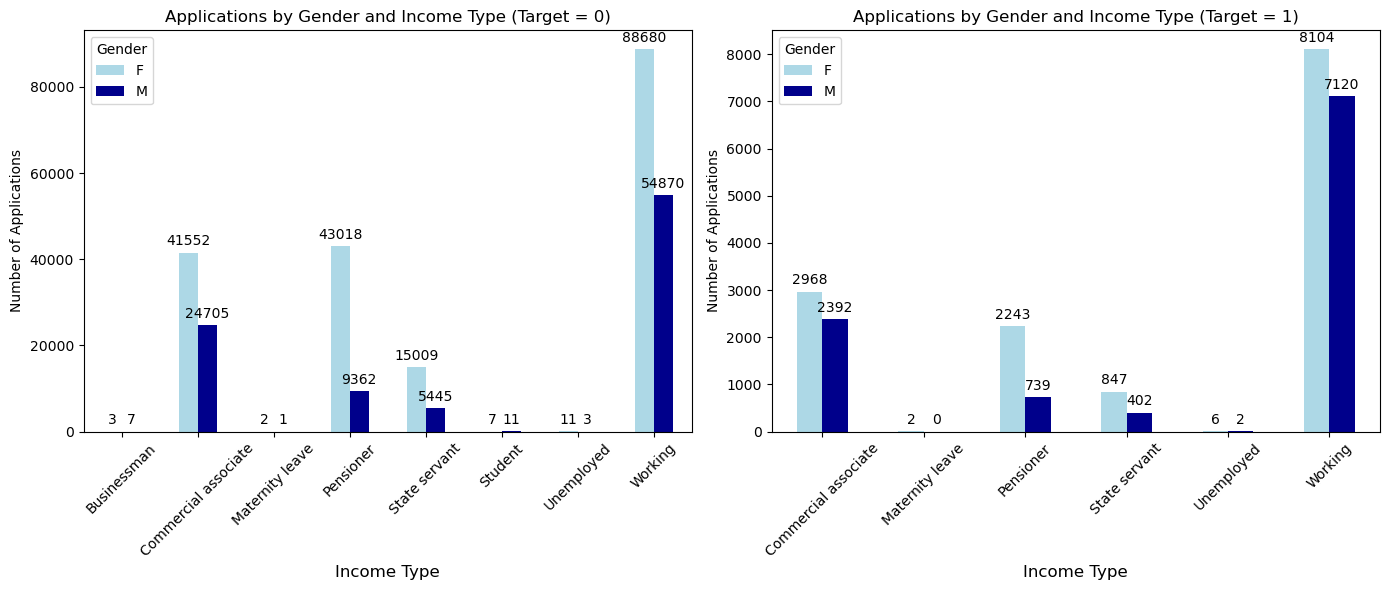

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non-defaulters plot
gender_counts_nondefaulters.plot(kind='bar', ax=axes[0], color=['lightblue','darkblue'])
axes[0].set_title("Applications by Gender and Income Type (Target = 0)", fontsize=12)
axes[0].set_xlabel("Income Type", fontsize=12)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].legend(title='Gender', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=3)  
    
# Defaulters plot
gender_counts_defaulters.plot(kind='bar', ax=axes[1], color=['lightblue','darkblue'])
axes[1].set_title("Applications by Gender and Income Type (Target = 1)", fontsize=12)
axes[1].set_xlabel("Income Type", fontsize=12)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].legend(title='Gender', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)


plt.tight_layout()
plt.show()

- Both genders face challenges, but men show higher defaults in the Working category, while low defaults among Pensioners suggest that retired individuals are generally better positioned to manage their financial obligations.


#### Relationship between Contact Type and Income Type as per Target

In [52]:
not_default_data = application_data[application_data['TARGET'] == 0]
counts_nondefaulters = (not_default_data.groupby(['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']).size().unstack(fill_value=0) )
print("Number of Applications by Income Type and Contract Status (Target = 0):\n")
print(counts_nondefaulters  )



default_data = application_data[application_data['TARGET'] == 1]
counts_defaulters = (default_data.groupby(['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']).size() .unstack(fill_value=0))  
print("\nNumber of Applications by Income Type and Contract Status (Target = 1):\n")
print(counts_defaulters)

Number of Applications by Income Type and Contract Status (Target = 0):

NAME_CONTRACT_TYPE    Cash loans  Revolving loans
NAME_INCOME_TYPE                                 
Businessman                    0               10
Commercial associate       58662             7595
Maternity leave                0                3
Pensioner                  49151             3229
State servant              18648             1806
Student                       15                3
Unemployed                     7                7
Working                   128528            15022

Number of Applications by Income Type and Contract Status (Target = 1):

NAME_CONTRACT_TYPE    Cash loans  Revolving loans
NAME_INCOME_TYPE                                 
Commercial associate        4990              370
Maternity leave                2                0
Pensioner                   2842              140
State servant               1188               61
Unemployed                     8                0
Wor

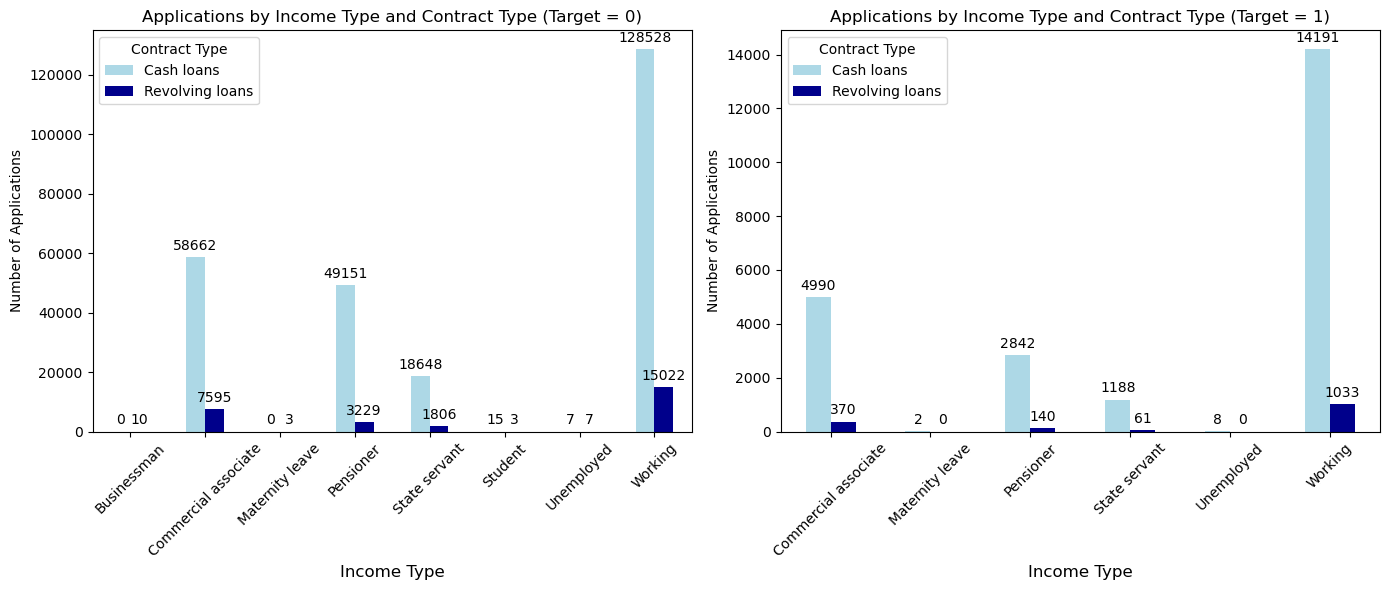

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non-defaulters plot
counts_nondefaulters.plot(kind='bar', ax=axes[0], color=['lightblue', 'darkblue'])
axes[0].set_title("Applications by Income Type and Contract Type (Target = 0)", fontsize=12)
axes[0].set_xlabel("Income Type", fontsize=12)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].legend(title='Contract Type', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=3)

# Defaulters plot
counts_defaulters.plot(kind='bar', ax=axes[1], color=['lightblue', 'darkblue'])
axes[1].set_title("Applications by Income Type and Contract Type (Target = 1)", fontsize=12)
axes[1].set_xlabel("Income Type", fontsize=12)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].legend(title='Contract Type', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

- The "Working" category accounts for approximately 70% of total non-defaulter applications, while the "Commercial associate" contributes about 25% of these applications.
- among defaulters, both the "Commercial associate" and "Working" categories represent roughly 20% of their total applications, highlighting a higher risk associated with these income types.

#### Average Income by Gender as per Target

In [54]:
income_gender = application_data.groupby(['CODE_GENDER','TARGET'])['AMT_INCOME_TOTAL'].mean().reset_index(name="Average_income")
print("\nAverage Income by Gender as per Target:\n")
print(income_gender)


Average Income by Gender as per Target:

  CODE_GENDER  TARGET  Average_income
0           F       0   155984.898721
1           F       1   156670.941531
2           M       0   195190.418791
3           M       1   177502.085687


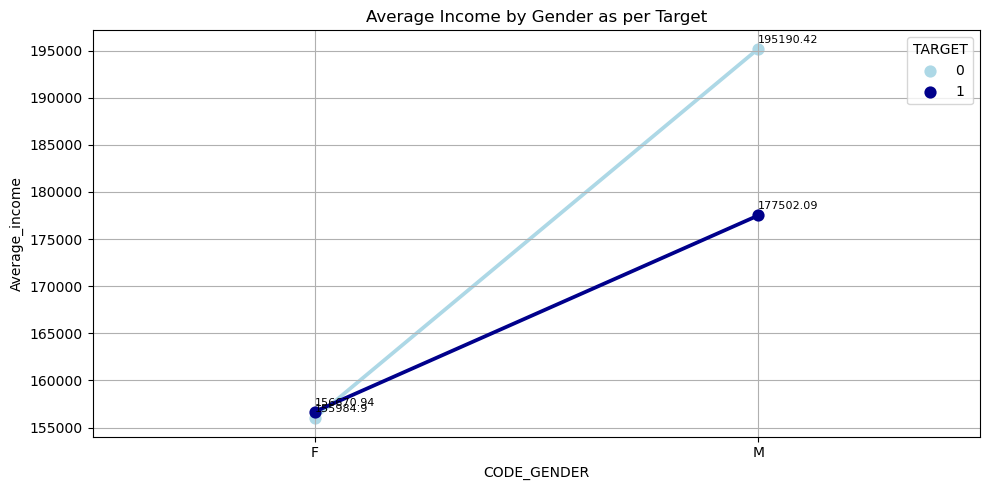

In [55]:
plt.figure(figsize=(10, 5))
bar_plot = sns.pointplot(data=income_gender, x='CODE_GENDER', y='Average_income', hue='TARGET',palette=['lightblue', 'darkblue'])

plt.grid()
plt.title("Average Income by Gender as per Target")

for i in range(len(income_gender)):
    bar_plot.annotate(
        f'{round(income_gender["Average_income"][i], 2)}', 
        (i // 2, income_gender["Average_income"][i]), 
        ha='left', va='bottom', fontsize=8, color='black',  
        xytext=(0, 3),  
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

- Overall, males have a higher average income than females in both target categories, indicating a gender income gap.
- While female incomes are closer in range between defaulters and non-defaulters, male incomes show a more significant disparity, suggesting that income stability could be more critical for male borrowers in avoiding defaults.

#### Relationship between Family Members and Family Status as per Target

In [56]:
bin_size = 2 
bins = np.arange(application_data['CNT_FAM_MEMBERS'].min(),application_data['CNT_FAM_MEMBERS'].max() + bin_size + 1, bin_size)  
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins) - 1)]
application_data['FAMILY_MEMBERS_RANGE'] = pd.cut(application_data['CNT_FAM_MEMBERS'], bins=bins, labels=labels, include_lowest=True)

print(application_data['FAMILY_MEMBERS_RANGE'])

0         1-2
1         1-2
2         1-2
3         1-2
4         1-2
         ... 
307506    1-2
307507    1-2
307508    1-2
307509    1-2
307510    1-2
Name: FAMILY_MEMBERS_RANGE, Length: 307511, dtype: category
Categories (10, object): ['1-2' < '3-4' < '5-6' < '7-8' ... '13-14' < '15-16' < '17-18' < '19-20']


In [57]:
not_default_data = application_data[application_data['TARGET'] == 0]
family_status_counts_nondefaulters = (not_default_data.groupby(['FAMILY_MEMBERS_RANGE','NAME_FAMILY_STATUS']).size().unstack(fill_value=0) )
print("Number of Applications by Family Members and Family Status (Target = 0):\n")
print(family_status_counts_nondefaulters )



default_data = application_data[application_data['TARGET'] == 1]
family_status_counts_defaulters = (default_data.groupby(['FAMILY_MEMBERS_RANGE','NAME_FAMILY_STATUS']).size() .unstack(fill_value=0))  
print("\nNumber of Applications by Family Members and Family Status (Target = 1):\n")
print(family_status_counts_defaulters)

Number of Applications by Family Members and Family Status (Target = 0):

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
FAMILY_MEMBERS_RANGE                                       
1-2                            24847   157646      18024   
3-4                             1937    23517        123   
5-6                               28      394          2   
7-8                                2       17          0   
9-10                               0        2          0   
11-12                              0        2          0   
13-14                              0        2          1   
15-16                              0        2          0   
17-18                              0        0          0   
19-20                              0        0          0   

NAME_FAMILY_STATUS    Single / not married  Unknown  Widow  
FAMILY_MEMBERS_RANGE                                        
1-2                                  40904        0  15092  
3-4                   

C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3813454722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_status_counts_nondefaulters = (not_default_data.groupby(['FAMILY_MEMBERS_RANGE','NAME_FAMILY_STATUS']).size().unstack(fill_value=0) )
C:\Users\hp\AppData\Local\Temp\ipykernel_14864\3813454722.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_status_counts_defaulters = (default_data.groupby(['FAMILY_MEMBERS_RANGE','NAME_FAMILY_STATUS']).size() .unstack(fill_value=0))


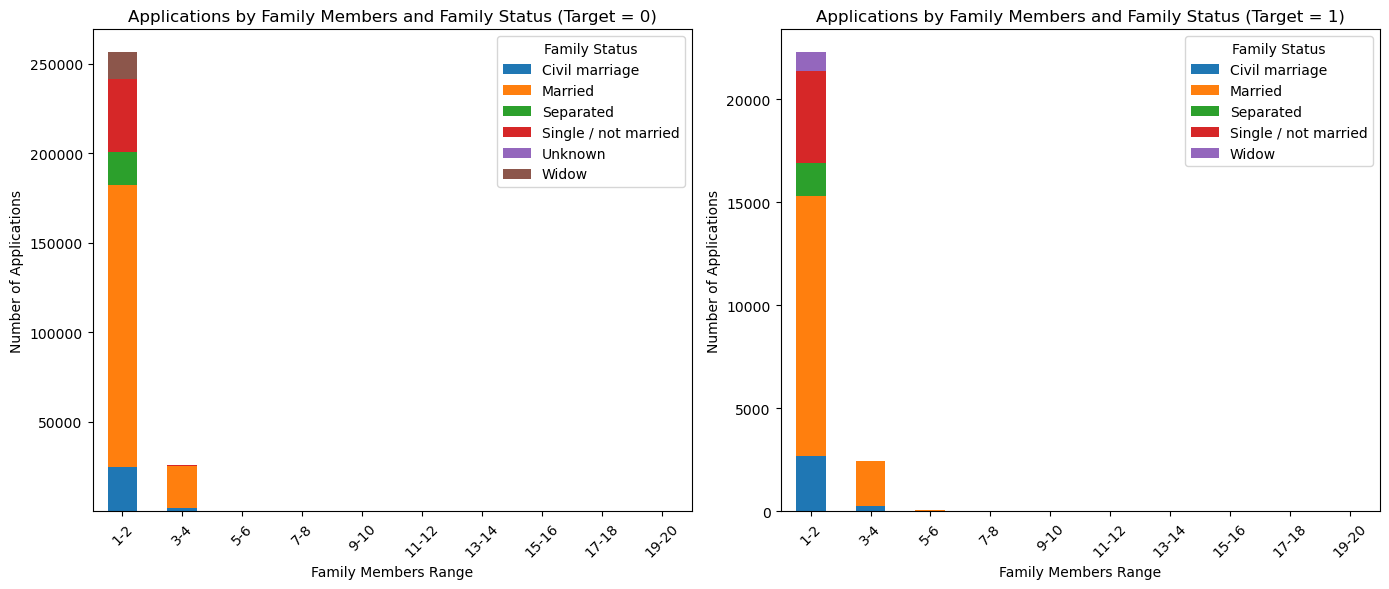

In [58]:
family_status_counts_nondefaulters.fillna(0, inplace=True)
family_status_counts_defaulters.fillna(0, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non-defaulters plot
family_status_counts_nondefaulters.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title("Applications by Family Members and Family Status (Target = 0)", fontsize=12)
axes[0].set_xlabel("Family Members Range", fontsize=10)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].legend(title='Family Status')
axes[0].tick_params(axis='x', rotation=45)



# Defaulters plot
family_status_counts_defaulters.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title("Applications by Family Members and Family Status (Target = 1)", fontsize=12)
axes[1].set_xlabel("Family Members Range", fontsize=10)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].legend(title='Family Status')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

- The majority of non-defaulters come from families with 1-2 members, with 157,646 applications from married individuals and 40,904 applications from single or unmarried applicants. This suggests that smaller family units may find it easier to manage finances, leading to higher rates of loan repayment.
- In contrast, applications from families with 3-4 members remain significant, with 23,517 applications from married couples in this category. However, there is a sharp decline in applications for families with 5 or more members, indicating that larger families may encounter more financial challenges.
- In the default category, the trend reveals that smaller families still have the highest number of defaults, with 12,625 defaulters among married individuals and 4,442 defaulters for singles. This indicates that even though smaller family units may generally be more financially stable, they can still encounter significant financial difficulties leading to defaults.
- In contrast, larger families show relatively low default rates, suggesting that having more family members can provide a buffer against financial hardships. 

#### Correlation of Columns for Target and External Sources

In [59]:
columns_of_interest = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

correlation_matrix:

                TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000


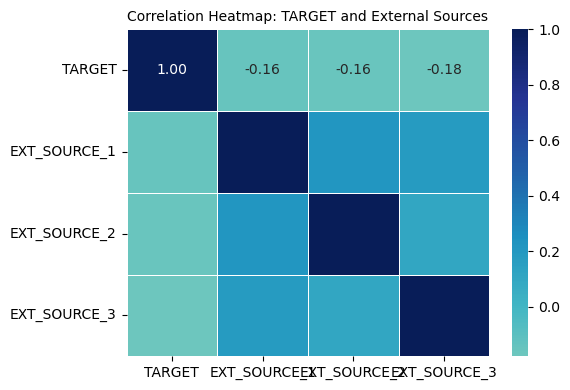

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap: TARGET and External Sources', fontsize=10)
plt.xticks(rotation=0, ha='center') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Negative Correlation with TARGET: All external sources (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3) show a negative correlation with the target variable, suggesting that higher values in these external sources may be associated with a lower likelihood of the target event occurring (e.g., defaults). 

#### Correlation of Columns for Target , Flag_phone and Flag_email

In [61]:
columns_of_interest = ['TARGET', 'FLAG_PHONE', 'FLAG_EMAIL']
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

correlation_matrix:

              TARGET  FLAG_PHONE  FLAG_EMAIL
TARGET      1.000000   -0.023806   -0.001758
FLAG_PHONE -0.023806    1.000000    0.014657
FLAG_EMAIL -0.001758    0.014657    1.000000


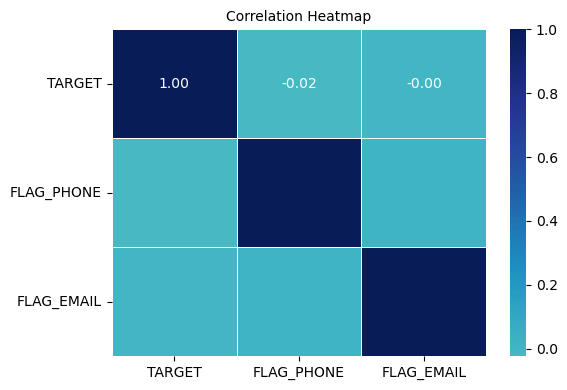

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap', fontsize=10)
plt.xticks(rotation=0, ha='center') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Both FLAG_PHONE and FLAG_EMAIL exhibit very weak negative correlations with the target variable, at -0.0238 and -0.0018, respectively. This suggests that having a phone or email contact does not significantly influence the likelihood of the target event occurring.

#### Correlation of Columns for Target and Enquiries to Credit Bureau

In [63]:
columns_of_interest = ['TARGET', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

correlation_matrix:

                              TARGET  AMT_REQ_CREDIT_BUREAU_HOUR  \
TARGET                      1.000000                    0.000930   
AMT_REQ_CREDIT_BUREAU_HOUR  0.000930                    1.000000   
AMT_REQ_CREDIT_BUREAU_DAY   0.002704                    0.230374   
AMT_REQ_CREDIT_BUREAU_WEEK  0.000788                    0.004706   
AMT_REQ_CREDIT_BUREAU_MON  -0.012462                   -0.000018   
AMT_REQ_CREDIT_BUREAU_QRT  -0.002022                   -0.002716   
AMT_REQ_CREDIT_BUREAU_YEAR  0.019930                   -0.004597   

                            AMT_REQ_CREDIT_BUREAU_DAY  \
TARGET                                       0.002704   
AMT_REQ_CREDIT_BUREAU_HOUR                   0.230374   
AMT_REQ_CREDIT_BUREAU_DAY                    1.000000   
AMT_REQ_CREDIT_BUREAU_WEEK                   0.217412   
AMT_REQ_CREDIT_BUREAU_MON                   -0.005258   
AMT_REQ_CREDIT_BUREAU_QRT                   -0.004416   
AMT_REQ_CREDIT_BUREAU_YEAR         

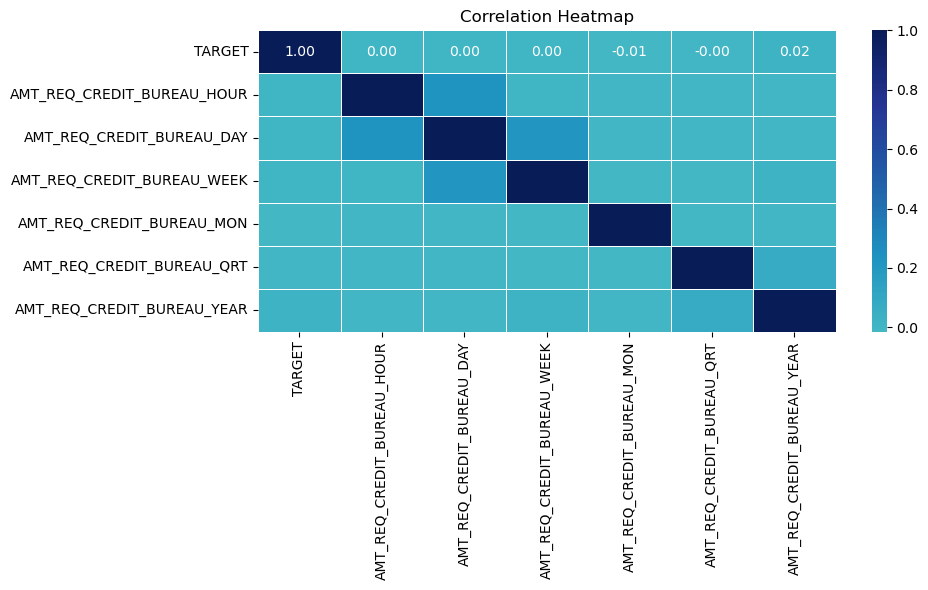

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90,ha='center' ) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- The correlation values between the TARGET variable (indicating default status) and the credit bureau request metrics are all very low, suggesting that the frequency of credit bureau inquiries does not strongly influence whether an applicant is a defaulter or non-defaulter.

#### Correlation of Columns for Target and Client's Social Surroundings

In [65]:
columns_of_interest = ['TARGET', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                            'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                            'DEF_60_CNT_SOCIAL_CIRCLE']
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

correlation_matrix:

                            TARGET  OBS_30_CNT_SOCIAL_CIRCLE  \
TARGET                    1.000000                  0.009131   
OBS_30_CNT_SOCIAL_CIRCLE  0.009131                  1.000000   
DEF_30_CNT_SOCIAL_CIRCLE  0.032248                  0.329338   
OBS_60_CNT_SOCIAL_CIRCLE  0.009022                  0.998490   
DEF_60_CNT_SOCIAL_CIRCLE  0.031276                  0.253499   

                          DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
TARGET                                    0.032248                  0.009022   
OBS_30_CNT_SOCIAL_CIRCLE                  0.329338                  0.998490   
DEF_30_CNT_SOCIAL_CIRCLE                  1.000000                  0.331571   
OBS_60_CNT_SOCIAL_CIRCLE                  0.331571                  1.000000   
DEF_60_CNT_SOCIAL_CIRCLE                  0.860517                  0.255570   

                          DEF_60_CNT_SOCIAL_CIRCLE  
TARGET                                    0.031276  
OBS_30_

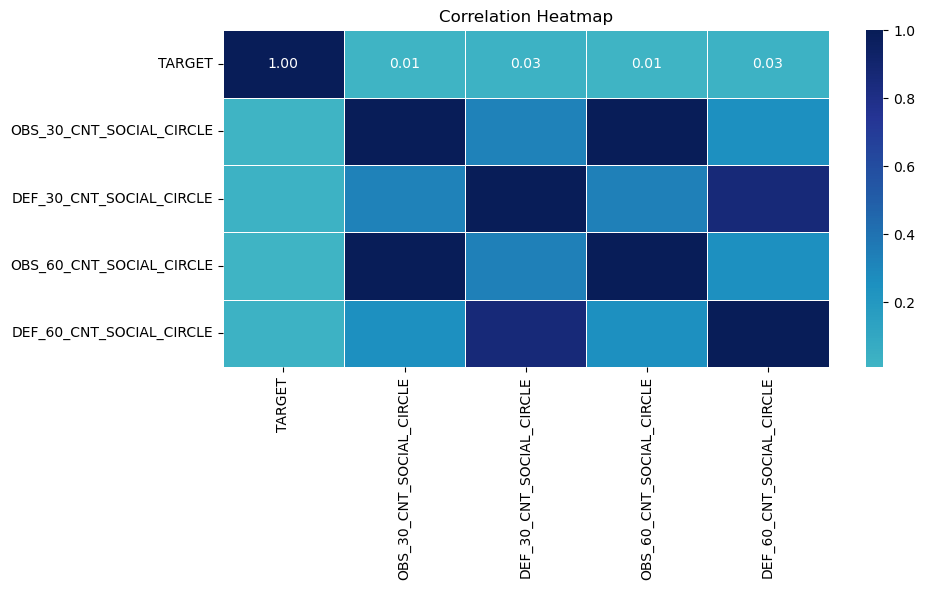

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90,ha='center' ) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- The correlation of TARGET with OBS_30_CNT_SOCIAL_CIRCLE (0.009131) and OBS_60_CNT_SOCIAL_CIRCLE (0.009022) is very low, indicating that the number of observed social connections does not significantly influence the likelihood of default.
- The correlation with DEF_30_CNT_SOCIAL_CIRCLE (0.032248) and DEF_60_CNT_SOCIAL_CIRCLE (0.031276) suggests a minor relationship, indicating that a higher number of defaulters within social circles may slightly correlate with an increased likelihood of default. However, this relationship is still weak.

#### Correlation of Columns for Target and Flag Documents

In [67]:
columns_of_interest = ['TARGET'] + [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

correlation_matrix:

                    TARGET  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
TARGET            1.000000         0.005417         0.044346        -0.002672   
FLAG_DOCUMENT_2   0.005417         1.000000        -0.010174        -0.000059   
FLAG_DOCUMENT_3   0.044346        -0.010174         1.000000        -0.014110   
FLAG_DOCUMENT_4  -0.002672        -0.000059        -0.014110         1.000000   
FLAG_DOCUMENT_5  -0.000316        -0.000805        -0.193850        -0.001117   
FLAG_DOCUMENT_6  -0.028602        -0.002020        -0.486238        -0.002802   
FLAG_DOCUMENT_7  -0.001520        -0.000090        -0.021677        -0.000125   
FLAG_DOCUMENT_8  -0.008040        -0.001935        -0.465730        -0.002684   
FLAG_DOCUMENT_9  -0.004352        -0.000407        -0.097859        -0.000564   
FLAG_DOCUMENT_10 -0.001414        -0.000031        -0.007466        -0.000043   
FLAG_DOCUMENT_11 -0.004229        -0.000407        -0.093242        -0.000565   
FLAG_DO

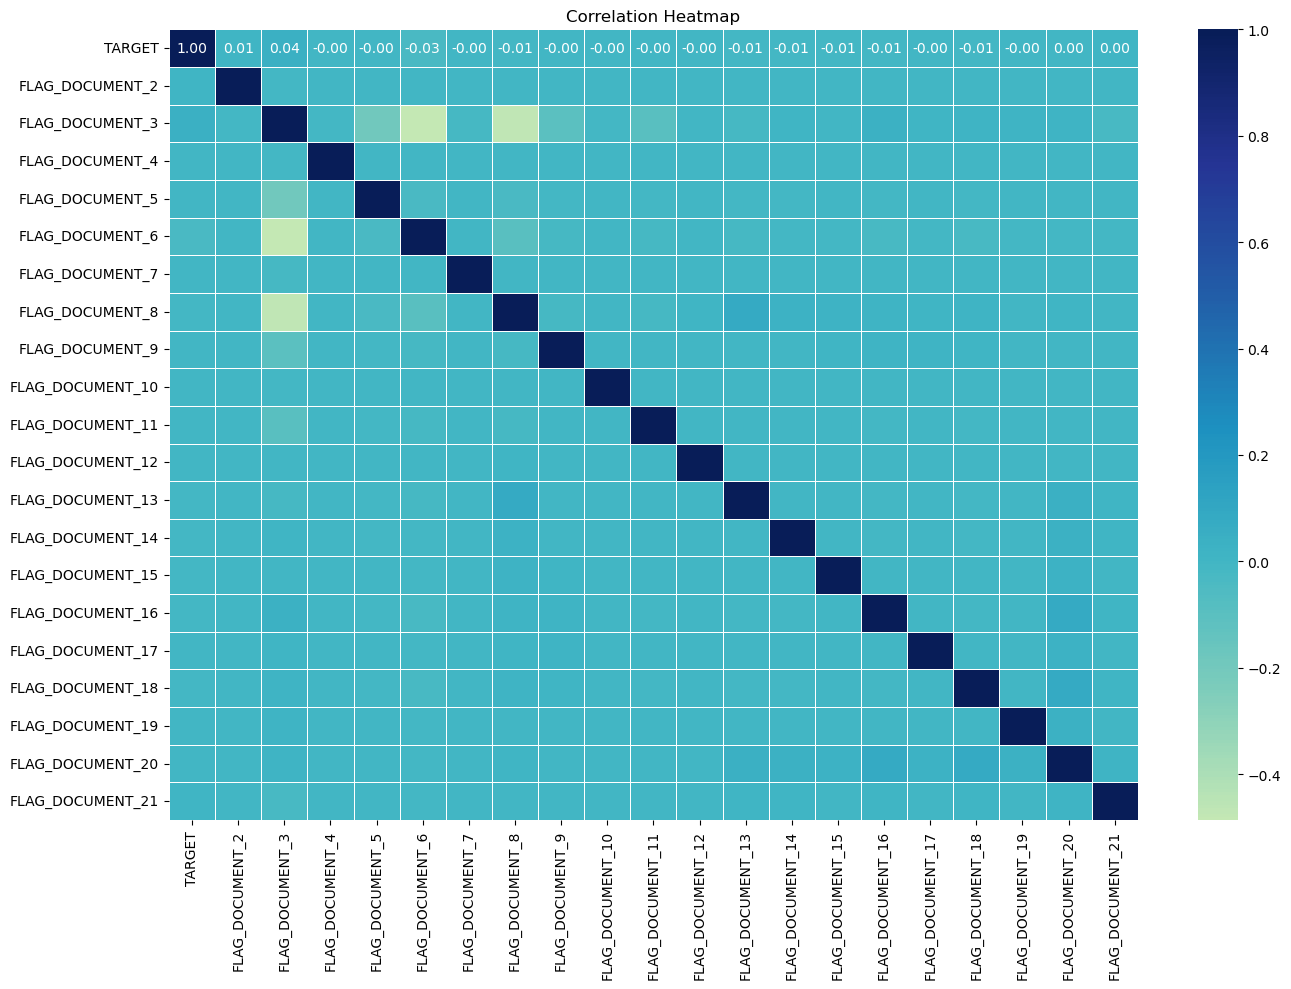

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90,ha='center' ) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Several flags, such as FLAG_DOCUMENT_3 and FLAG_DOCUMENT_6, exhibit slight negative correlations, suggesting that higher values may relate to a lower likelihood of default.
- Many flags, including FLAG_DOCUMENT_4 and FLAG_DOCUMENT_5, have near-zero correlation values, indicating they likely do not significantly influence defaulting behavior.
- While FLAG_DOCUMENT_18 shows a slightly positive correlation of 0.081589 with TARGET, and FLAG_DOCUMENT_20 is close to zero, both suggest minimal predictive relevance.

#### Region Rating and City rating with Respect to Target 

In [70]:
not_default_data = application_data[application_data['TARGET'] == 0]
region_city_counts_nondefaulters = (not_default_data.groupby(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']).size().unstack(fill_value=0))
print("Number of Applications by Region and City Rating (Target = 0):\n")
print(region_city_counts_nondefaulters)

default_data = application_data[application_data['TARGET'] == 1]
region_city_counts_defaulters = (default_data.groupby(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']).size().unstack(fill_value=0))
print("\nNumber of Applications by Region and City Rating (Target = 1):\n")
print(region_city_counts_defaulters)

Number of Applications by Region and City Rating (Target = 0):

REGION_RATING_CLIENT_W_CITY      1       2      3
REGION_RATING_CLIENT                             
1                            30645       0      0
2                             1189  207888      0
3                              679    3426  38859

Number of Applications by Region and City Rating (Target = 1):

REGION_RATING_CLIENT_W_CITY     1      2     3
REGION_RATING_CLIENT                          
1                            1552      0     0
2                              59  17848     0
3                              43    322  5001


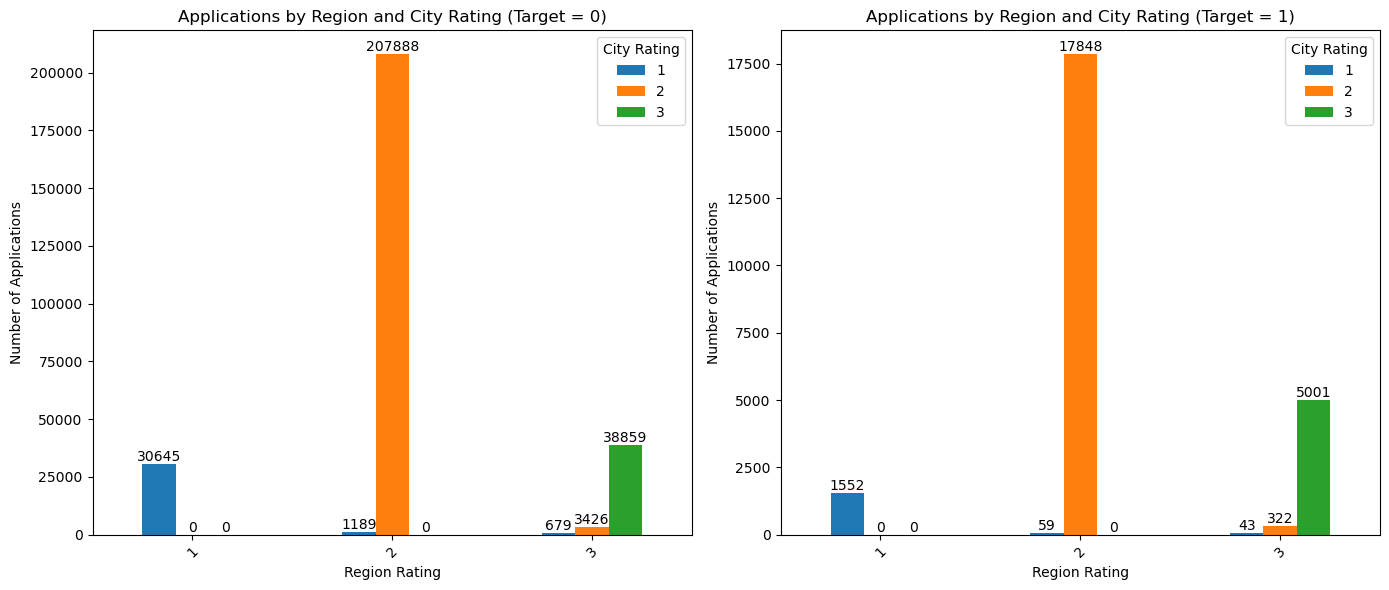

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Non-defaulters plot
nondefaulters = region_city_counts_nondefaulters.plot(kind='bar', ax=axes[0])
axes[0].set_title("Applications by Region and City Rating (Target = 0)", fontsize=12)
axes[0].set_xlabel("Region Rating", fontsize=10)
axes[0].set_ylabel("Number of Applications", fontsize=10)
axes[0].legend(title='City Rating')
axes[0].tick_params(axis='x', rotation=45)
for container in nondefaulters.containers:
    axes[0].bar_label(container)

# Defaulters plot
defaulters = region_city_counts_defaulters.plot(kind='bar', ax=axes[1])
axes[1].set_title("Applications by Region and City Rating (Target = 1)", fontsize=12)
axes[1].set_xlabel("Region Rating", fontsize=10)
axes[1].set_ylabel("Number of Applications", fontsize=10)
axes[1].legend(title='City Rating')
axes[1].tick_params(axis='x', rotation=45)
for container in defaulters.containers:
    axes[1].bar_label(container)

plt.tight_layout() 
plt.show()

correlation_matrix:

                               TARGET  REGION_RATING_CLIENT  \
TARGET                       1.000000              0.058899   
REGION_RATING_CLIENT         0.058899              1.000000   
REGION_RATING_CLIENT_W_CITY  0.060893              0.950842   

                             REGION_RATING_CLIENT_W_CITY  
TARGET                                          0.060893  
REGION_RATING_CLIENT                            0.950842  
REGION_RATING_CLIENT_W_CITY                     1.000000  


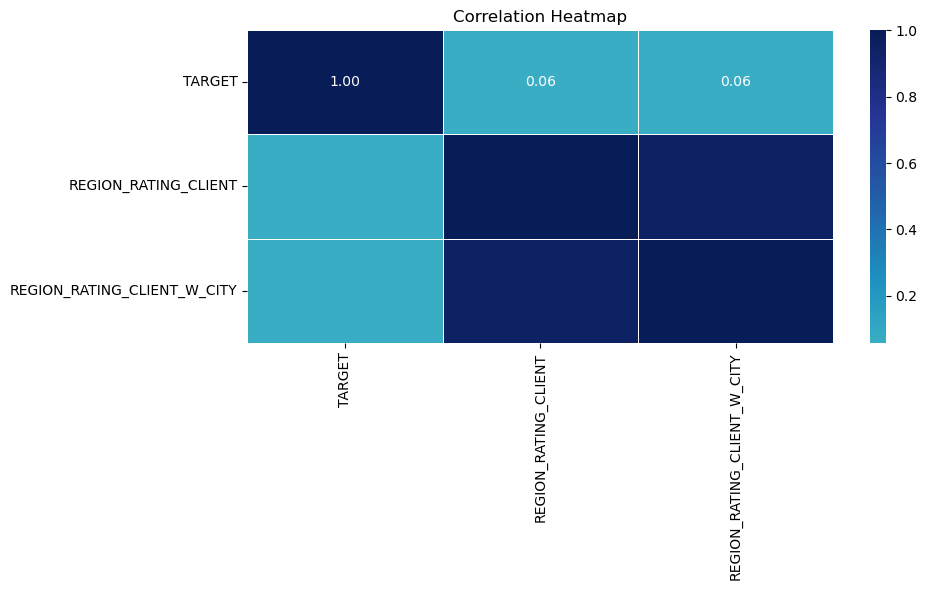

In [72]:
columns_of_interest = ['TARGET','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
correlation_matrix = application_data[columns_of_interest].corr()
print("correlation_matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="YlGnBu",center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=90,ha='center' ) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- The weak correlations suggest that while regional and city ratings have some connection to default behavior, they are not strong predictors. 

### PREVIOUS APPLICATION DATA 

#### Relationship between Current Application IDs and Previous Application IDs

In [76]:
previous_app_counts = previous_application_data['SK_ID_CURR'].value_counts().sort_index()
print("\nNumber of Previous Applications for each Current Application:\n")
print(previous_app_counts)



Number of Previous Applications for each Current Application:

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: count, Length: 338857, dtype: int64


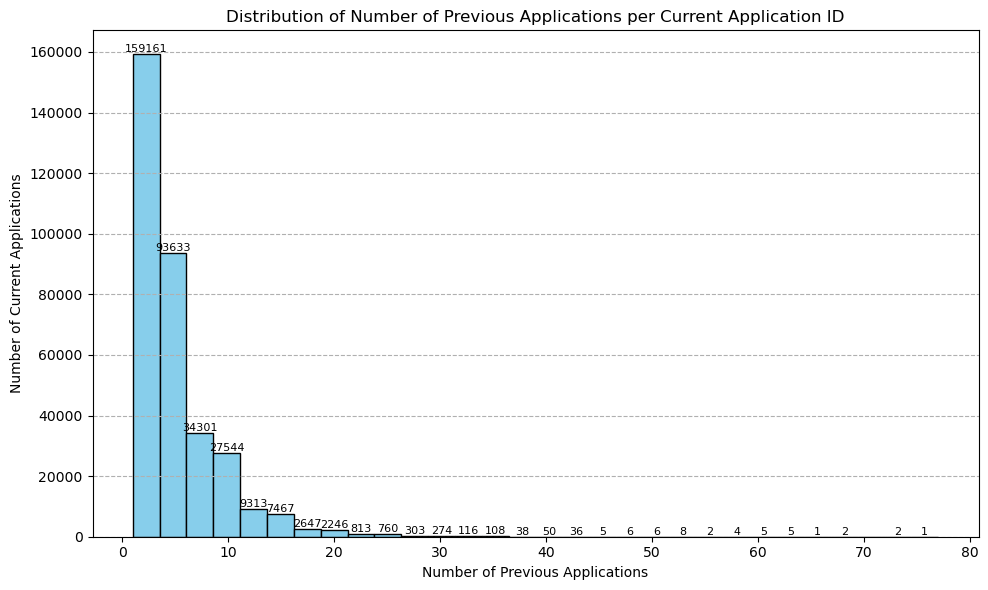

In [80]:
plt.figure(figsize=(10, 6))
previous_app_counts.plot(kind='hist', bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Number of Previous Applications per Current Application ID')
plt.xlabel('Number of Previous Applications')
plt.ylabel('Number of Current Applications')
plt.grid(axis='y', linestyle='--')

bin_edges = plt.gca().patches
for bin_edge in bin_edges:
    height = bin_edge.get_height()
    if height > 0:
        plt.text(bin_edge.get_x() + bin_edge.get_width() / 2, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

- Maxinum number of current applications have around 0to10 previous applications.
- The number keeps on decreasing with the greater number of previous applications.
- only three customer had previous applications greater than 70

#### Count of Contract Statuses

In [83]:
contract_status_counts = previous_application_data['NAME_CONTRACT_STATUS'].value_counts()
print("Count of Contract Statuses:\n")
print(contract_status_counts)

Count of Contract Statuses:

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


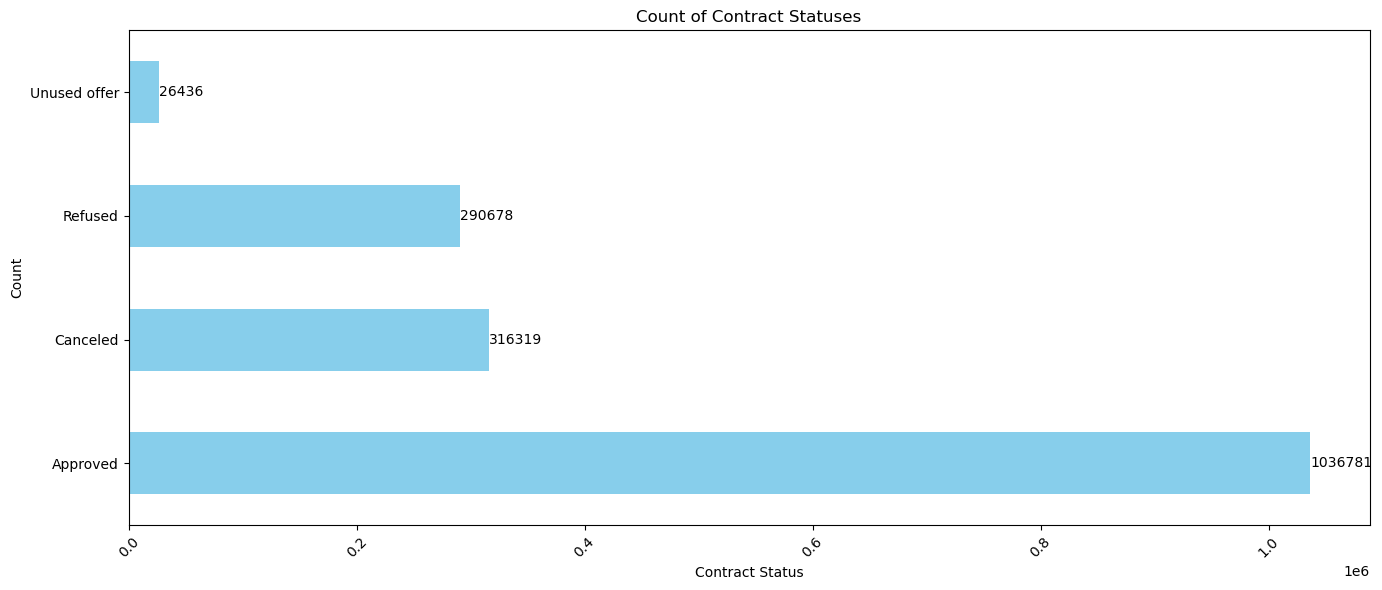

In [93]:
plt.figure(figsize=(14, 6))
bars = contract_status_counts.plot(kind='barh', color='skyblue')
plt.title('Count of Contract Statuses')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars.patches: 
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center', ha='left')
plt.tight_layout()
plt.show()

- The contract status data reveals a strong approval rate, with over 1 million contracts approved, indicating an effective acceptance process.
-  However, the significant numbers of cancellations (316,319) and refusals (290,678)—together accounting for about 37% of total contracts—highlight potential issues in negotiations or applications that warrant investigation.
-  The relatively low count of unused offers (26,436) suggests effective follow-up, yet it also raises the possibility of missed opportunities for conversion. 

#### Count of Application Statuses by Contact Type

In [97]:
mode_of_contract_type = previous_application_data['NAME_CONTRACT_TYPE'].mode().iloc[0]
previous_application_data['NAME_CONTRACT_TYPE'] = previous_application_data['NAME_CONTRACT_TYPE'].replace("XNA",mode_of_contract_type)
previous_application_data['NAME_CONTRACT_TYPE'].value_counts()


contract_type_status = previous_application_data.groupby(["NAME_CONTRACT_TYPE",'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count().reset_index(name='count')
print("\nContract Type and Status Counts:")
print(contract_type_status)



Contract Type and Status Counts:
   NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS   count
0          Cash loans             Approved  312540
1          Cash loans             Canceled  268906
2          Cash loans              Refused  165959
3          Cash loans         Unused offer     494
4      Consumer loans             Approved  626470
5      Consumer loans             Canceled    1559
6      Consumer loans              Refused   75185
7      Consumer loans         Unused offer   25937
8     Revolving loans             Approved   97771
9     Revolving loans             Canceled   45854
10    Revolving loans              Refused   49534
11    Revolving loans         Unused offer       5


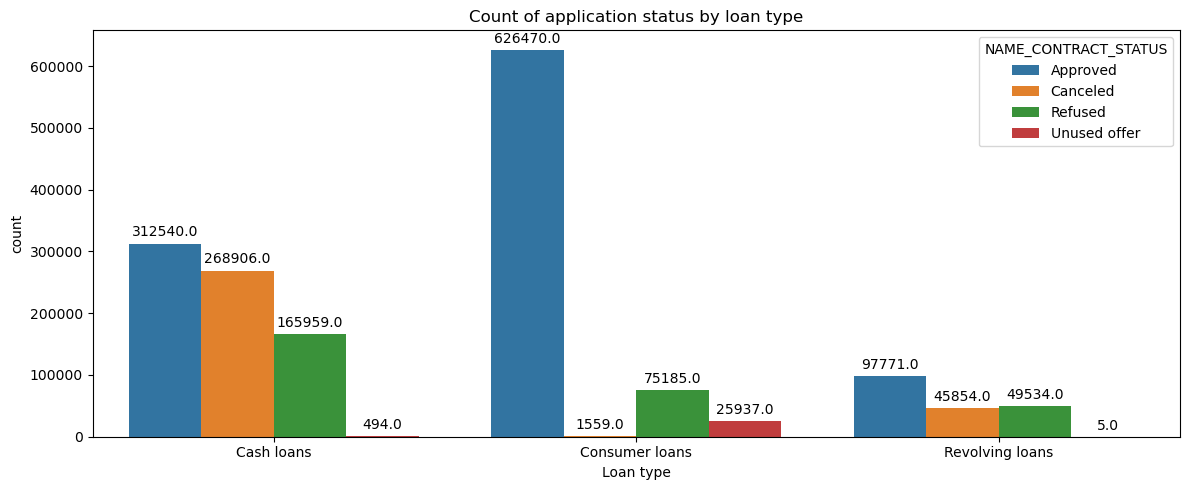

In [98]:
plt.figure(figsize=(12,5))
bar_plot = sns.barplot(x=contract_type_status['NAME_CONTRACT_TYPE'],y=contract_type_status["count"],hue=contract_type_status['NAME_CONTRACT_STATUS'])
plt.xlabel('Loan type')
plt.title("Count of application status by loan type")
for p in bar_plot.patches:
    bar_plot.annotate(f'{round(p.get_height(), 2)}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=10, color='black',  
                      xytext=(0, 3), 
                      textcoords='offset points')
plt.tight_layout()
plt.show()

- consumer loans have the highest approval count at 626,470, indicating strong demand and acceptance.
- In contrast, cash loans show a high cancellation rate (268,906) and a notable refusal count (165,959), suggesting potential challenges in this category.
- Revolving loans, while having the lowest approval count (97,771), also exhibit a significant number of refusals (49,534) and cancellations (45,854).
- The low counts of unused offers across all loan types indicate effective follow-up, but the discrepancies in approval and refusal rates suggest targeted improvements may be needed, particularly for cash and revolving loans, to enhance overall conversion rates.


#### Contract Status by Purpose

In [164]:
contract_status_purpose = previous_application_data.groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']).size().reset_index(name='count')
contract_status_purpose = contract_status_purpose.pivot(index='NAME_CONTRACT_STATUS', columns='NAME_CASH_LOAN_PURPOSE', values='count').fillna(0)

print("Grouped Data by Loan Purpose and Contract Status:\n")
print(contract_status_purpose)

Grouped Data by Loan Purpose and Contract Status:

NAME_CASH_LOAN_PURPOSE  Building a house or an annex  Business development  \
NAME_CONTRACT_STATUS                                                         
Approved                                       675.0                 130.0   
Canceled                                        98.0                  19.0   
Refused                                       1920.0                 277.0   
Unused offer                                     0.0                   0.0   

NAME_CASH_LOAN_PURPOSE  Buying a garage  Buying a holiday home / land  \
NAME_CONTRACT_STATUS                                                    
Approved                           39.0                         132.0   
Canceled                            8.0                          19.0   
Refused                            89.0                         382.0   
Unused offer                        0.0                           0.0   

NAME_CASH_LOAN_PURPOSE  Buying a home  Bu

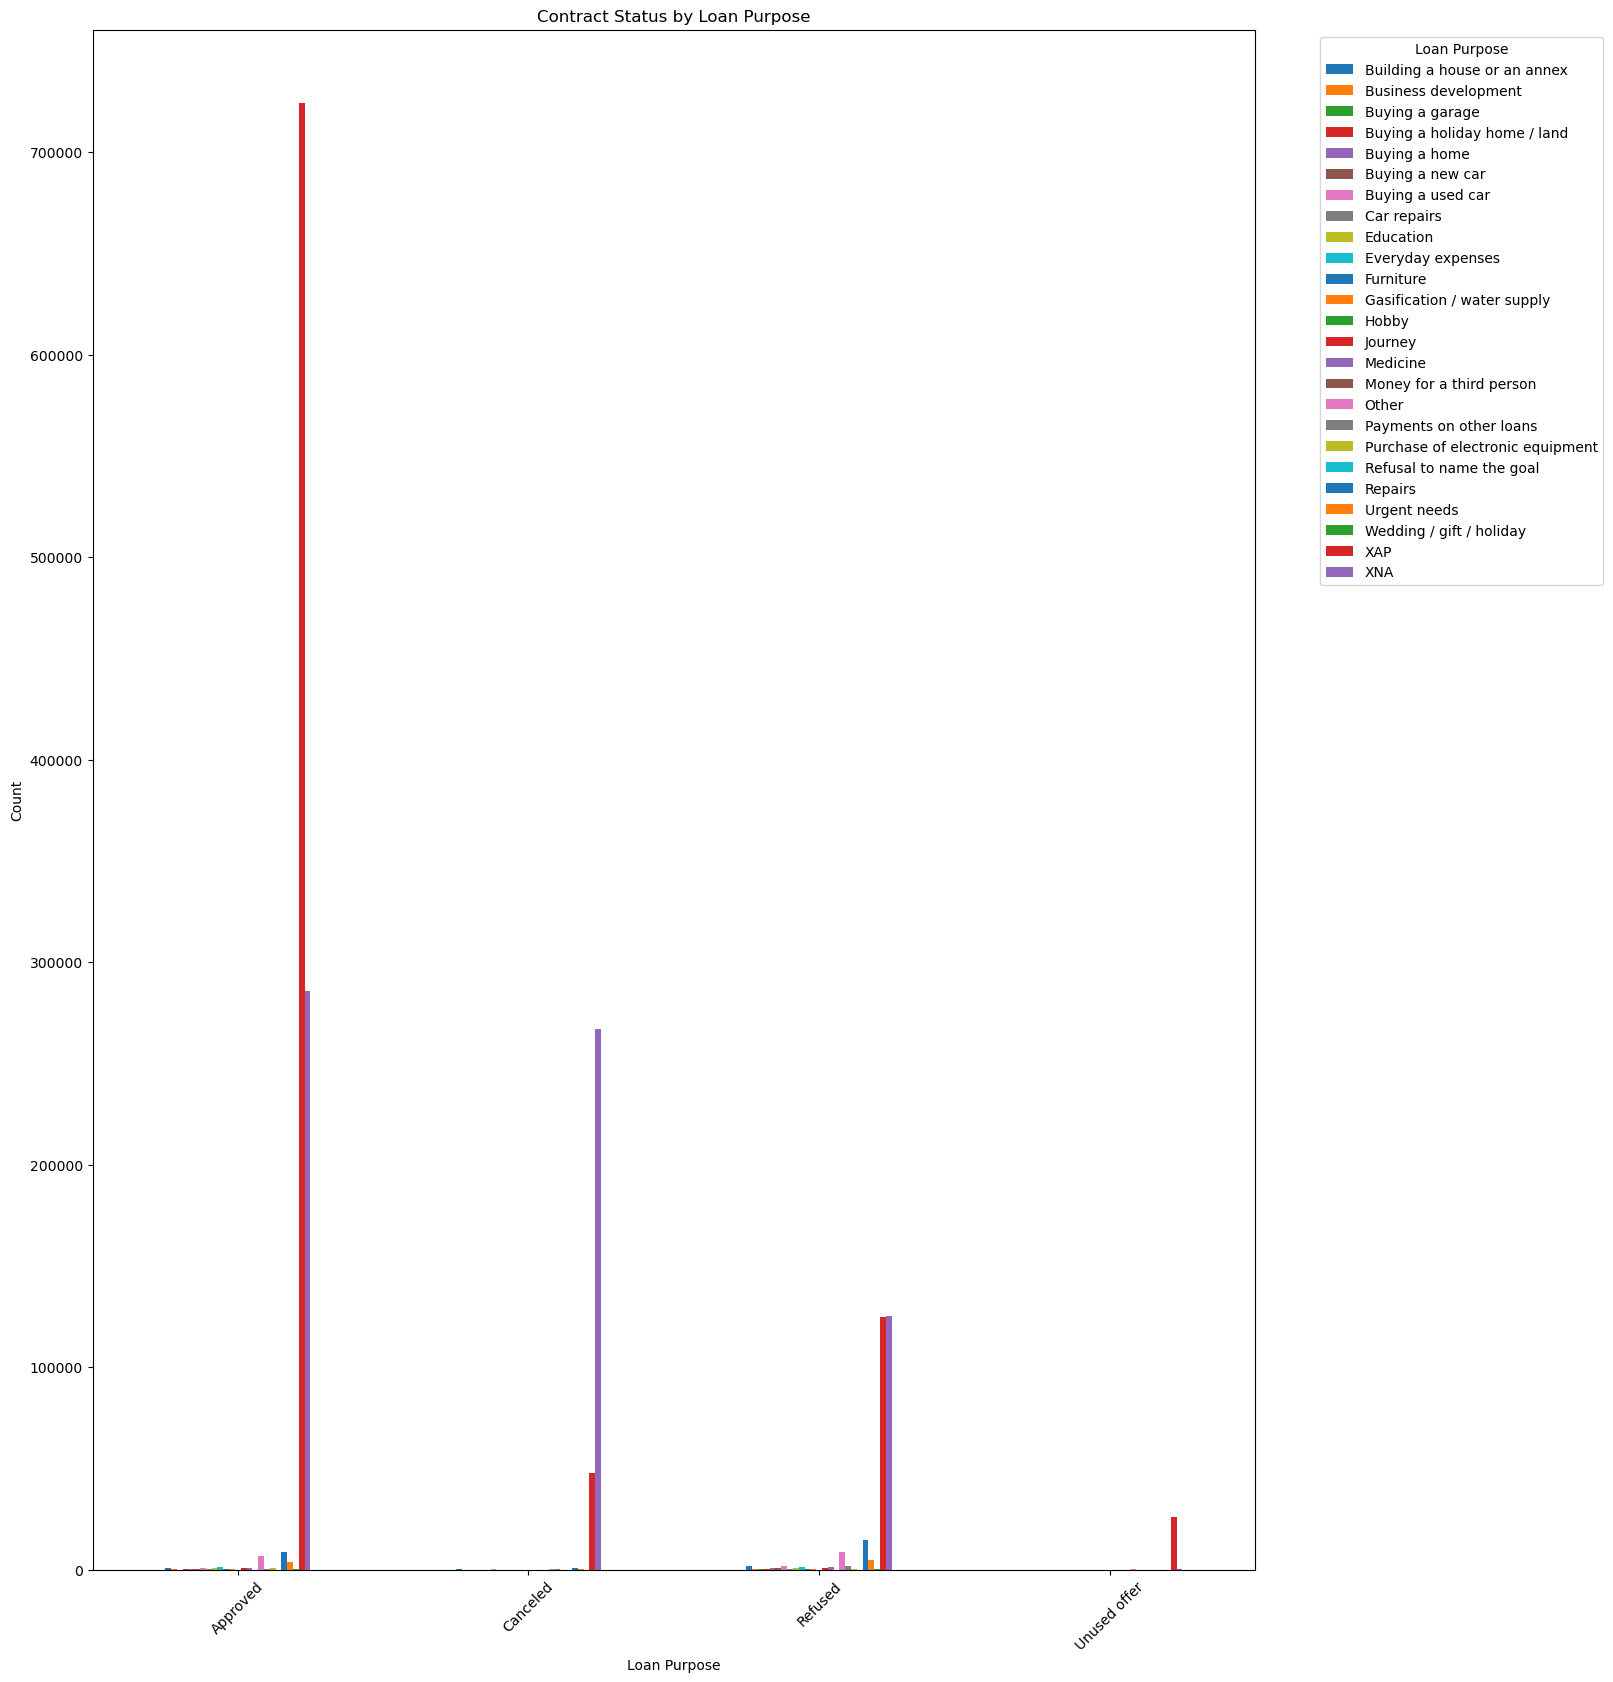

In [168]:
contract_status_purpose.plot(kind='bar', figsize=(15, 20))
plt.title('Contract Status by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Purposes like XAP, purchase of electronics, everey day expenses and education have maximum loan acceptance.
- Payment of other loans, refusal to name goal (can be suspicious) , buying new home or car have most refusals.
- 40% of XNA(Not available) purpose loans are cancelled, followed by buying a garage/home/car.
- % unused is too low to get any insight.


#### Contract Status by Channel

In [103]:
contract_status_channel = previous_application_data.groupby(['CHANNEL_TYPE', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)
print("Contract Status by Channel Type:")
print(contract_status_channel)

Contract Status by Channel Type:
NAME_CONTRACT_STATUS        Approved  Canceled  Refused  Unused offer
CHANNEL_TYPE                                                         
AP+ (Cash loan)                31231      3711    22099             5
Car dealer                       286        44      122             0
Channel of corporate sales      2649       136     3365             0
Contact center                 25220     30511    15566             0
Country-wide                  402787      1782    65762         24359
Credit and cash offices       289056    279973   150450           489
Regional / Local               96417        95    11326           690
Stone                         189135        67    21988           893


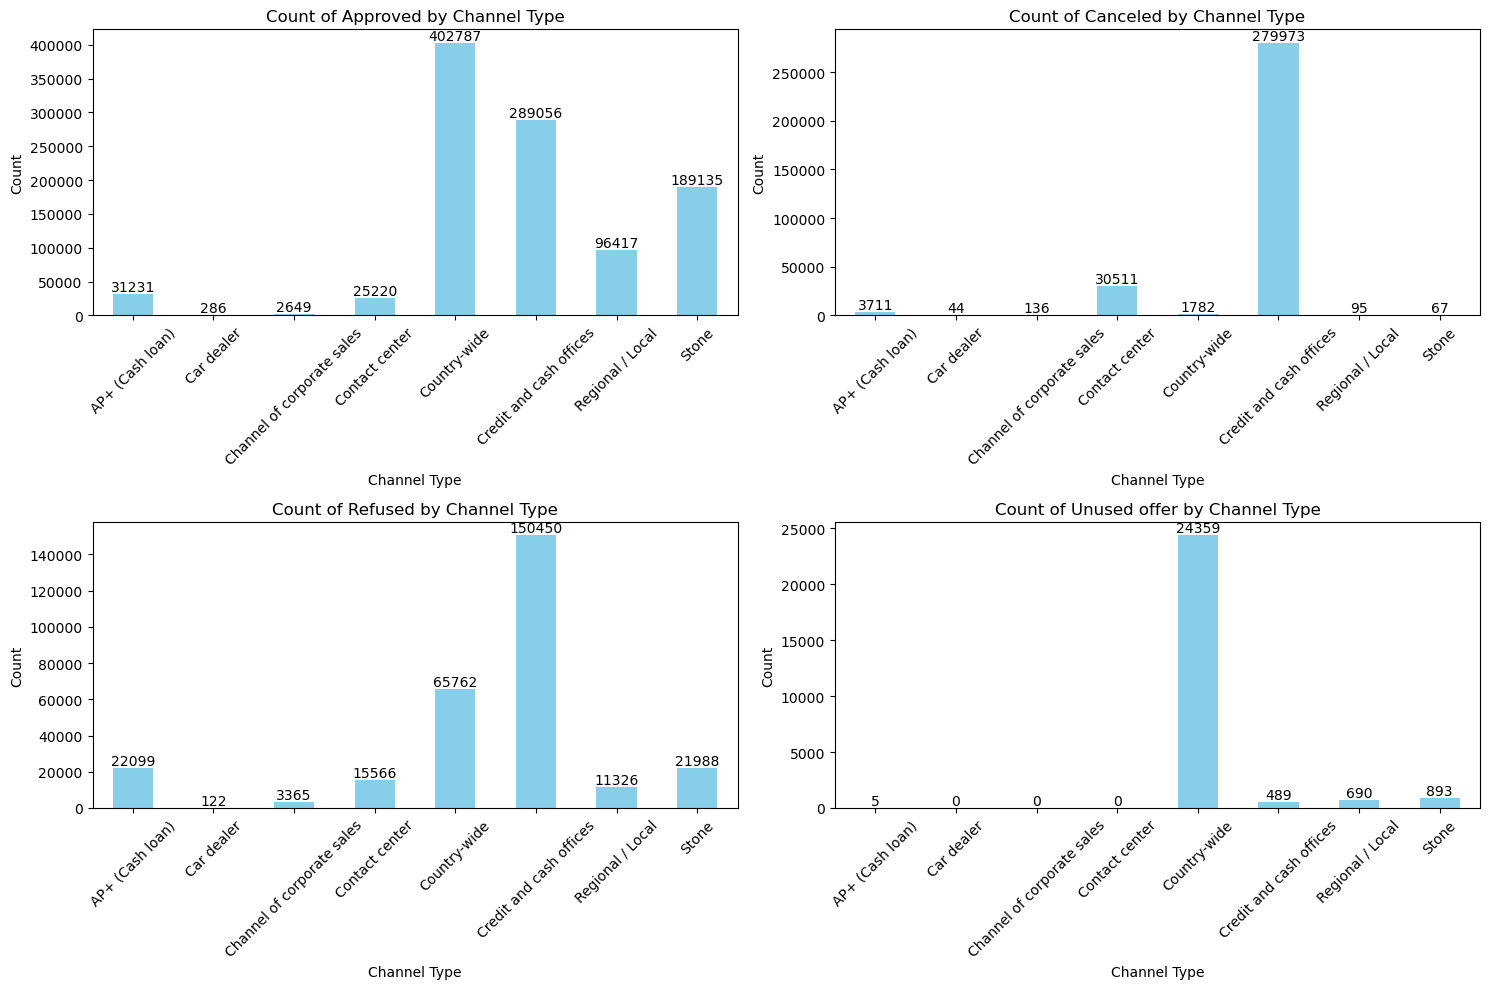

In [116]:
statuses = contract_status_channel.columns
num_statuses = len(statuses)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, status in zip(axes, statuses):
    bars = contract_status_channel[status].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Count of {status} by Channel Type')
    ax.set_xlabel('Channel Type')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(contract_status_channel.index)))
    ax.set_xticklabels(contract_status_channel.index, rotation=45)

    for bar in bars.patches:
        ax.annotate(f'{int(bar.get_height())}', 
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                    ha='center', va='bottom')

for i in range(num_statuses, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

-  The "Country-wide" channel has the highest approval count (402,787) and a relatively low cancellation rate (1,782), indicating strong performance in this channel
-  The "Contact center" channel has the highest cancellation count (30,511) and a significant number of refusals (15,566), suggesting potential issues in service or communication.
-  The "Regional / Local" and "Stone" channels display moderate performance but still have noteworthy refusal counts. 

#### Code Reject Reason Analysis

In [117]:
reject_reason_counts = previous_application_data['CODE_REJECT_REASON'].value_counts()

print("Code Reject Reason Counts:")
print(reject_reason_counts)

Code Reject Reason Counts:
CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64


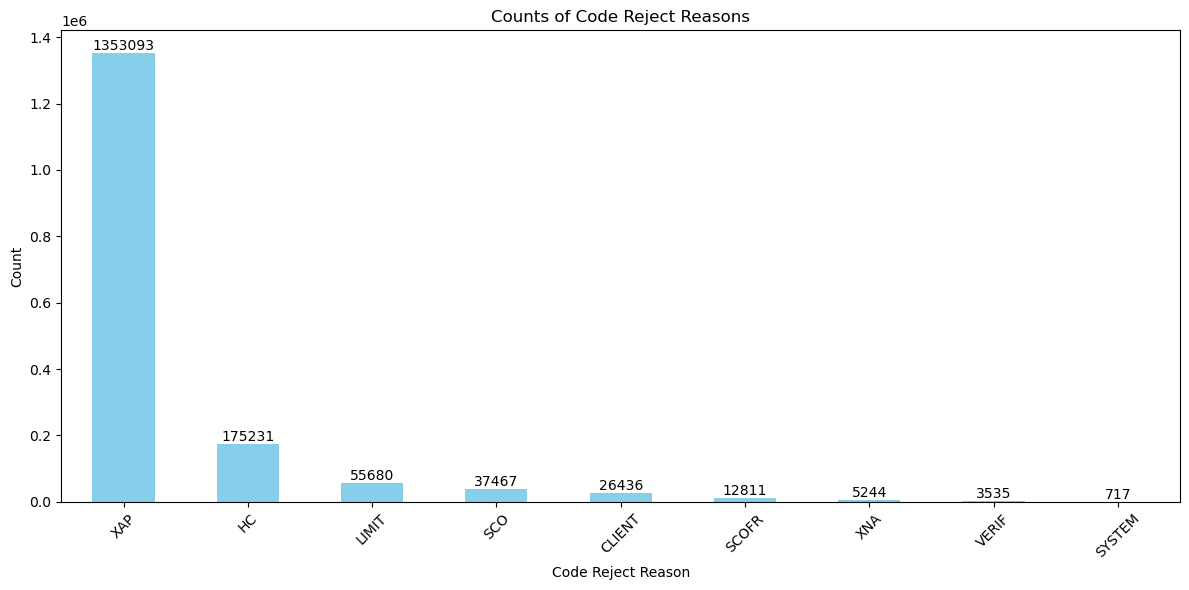

In [119]:
plt.figure(figsize=(12, 6))
reject_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Code Reject Reasons')
plt.xlabel('Code Reject Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(reject_reason_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- The rejection reason analysis reveals that "XAP" accounts for a staggering 80.34% of total rejections (1,353,093), highlighting it as a critical issue that requires immediate attention to improve approval rates.
- The second most significant reason, "HC," makes up 10.43% (175,231), suggesting another area where systemic problems may exist.
- The smaller rejection categories, including "CLIENT" (1.59%), "SCOFR" (0.77%), "XNA" (0.32%), "VERIF" (0.21%), and "SYSTEM" (0.04%), collectively account for a minor portion of total rejections

#### Average Credit by Contract Status

In [122]:
previous_application_data['AMT_CREDIT'] = previous_application_data['AMT_CREDIT'].fillna(0)

previous_application_data['AMT_CREDIT_rag'] = round(previous_application_data['AMT_CREDIT'] / 10000).astype(int)
bins = [-1, 100, 200, 300, 400, 500, 600, 700]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k Above']

previous_application_data['Credit_range'] = pd.cut(previous_application_data['AMT_CREDIT_rag'], bins, labels=labels)

avg_credit_contract_status = round(previous_application_data.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT'].mean().reset_index(name='avg_credit_amt'))

print("Average Credit Amount by Contract Status:")
print(avg_credit_contract_status)

Average Credit Amount by Contract Status:
  NAME_CONTRACT_STATUS  avg_credit_amt
0             Approved        202564.0
1             Canceled         24187.0
2              Refused        371690.0
3         Unused offer         69784.0


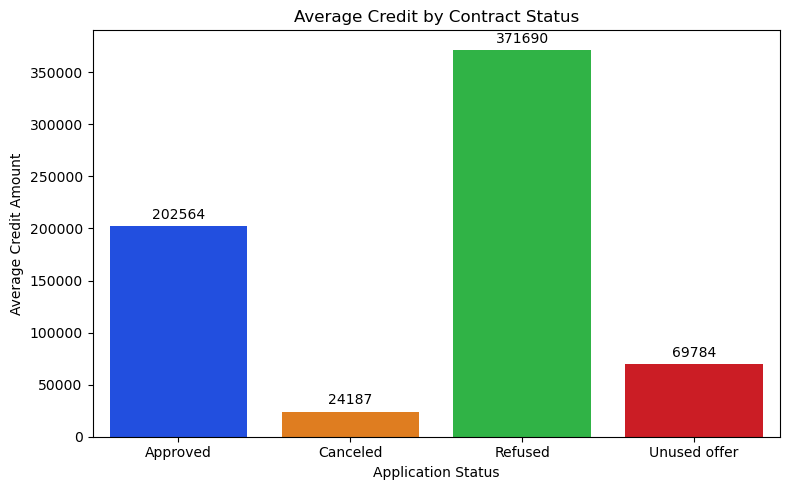

In [130]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=avg_credit_contract_status, x='NAME_CONTRACT_STATUS', y='avg_credit_amt', palette='bright')
plt.title("Average Credit by Contract Status")
plt.xlabel("Application Status")
plt.ylabel("Average Credit Amount")
bar_plot.bar_label(bar_plot.containers[0], fmt='%.0f', label_type='edge', padding=3)
plt.tight_layout()
plt.show()

 - Approved contracts have an average credit amount of 202,564, indicating robust lending practices for accepted applications.
 - In contrast, canceled contracts show a significantly lower average of 24,187, which may suggest that these amounts are less committed or that smaller loans are being abandoned.
 - Refused contracts have the highest average credit amount at 371,690, which means that larger loan requests are often denied. This could suggest that the lending criteria are strict or that there is a mismatch between what borrowers are asking for and what they qualify for.
 - the average for unused offers at 69,784 suggests a moderate value, indicating opportunities for conversion if follow-up strategies are improved.

#### Days to Decision and Number of Applications

In [141]:
previous_application_data['MONTHS_DECISION'] = (previous_application_data['DAYS_DECISION'] / 30).astype(int).abs()

bins = range(0, 98, 10)  
labels = [f'{i}-{i+9}' for i in bins[:-1]] 
previous_application_data['MONTHS_DECISION_BINS'] = pd.cut(previous_application_data['MONTHS_DECISION'], bins=bins, right=False, labels=labels)

months_to_decision_counts = previous_application_data['MONTHS_DECISION_BINS'].value_counts().sort_index()
print("Counts of Applications by Months to Decision:\n")
print(months_to_decision_counts)



Counts of Applications by Months to Decision:

MONTHS_DECISION_BINS
0-9      454540
10-19    396328
20-29    221365
30-39    145019
40-49    100850
50-59     83022
60-69     66577
70-79     73327
80-89     83215
Name: count, dtype: int64


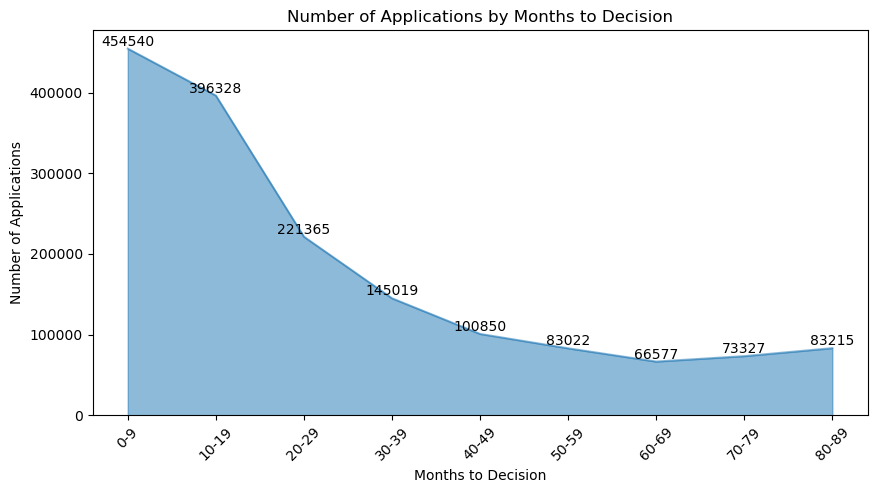

In [140]:
plt.figure(figsize=(10, 5))
months_to_decision_counts.plot(kind='area', alpha=0.5)
plt.title('Number of Applications by Months to Decision')
plt.xlabel('Months to Decision')
plt.ylabel('Number of Applications')

plt.xticks(ticks=range(len(months_to_decision_counts.index)), labels=months_to_decision_counts.index, rotation=45)

for i, value in enumerate(months_to_decision_counts):
    plt.text(i, value, int(value), ha='center', va='bottom')
plt.show()

#### Good Category and Contract Status

In [31]:
goods_status = previous_application_data.groupby(['NAME_GOODS_CATEGORY', 'NAME_CONTRACT_STATUS']).size().reset_index(name='count')
goods_status = goods_status.pivot(index='NAME_GOODS_CATEGORY', columns='NAME_CONTRACT_STATUS', values='count').fillna(0)

# Print the pivot table
print("Grouped Data by Goods Category and Contract Status:\n")
print(goods_status)

Grouped Data by Goods Category and Contract Status:

NAME_CONTRACT_STATUS      Approved  Canceled   Refused  Unused offer
NAME_GOODS_CATEGORY                                                 
Additional Service           116.0       0.0      12.0           0.0
Animals                        1.0       0.0       0.0           0.0
Audio/Video                89394.0      32.0    9080.0         935.0
Auto Accessories            6560.0       2.0     679.0         140.0
Clothing and Accessories   21460.0       0.0    2010.0          84.0
Computers                  88050.0      35.0   13534.0        4150.0
Construction Materials     22471.0       7.0    2454.0          63.0
Consumer Electronics      111525.0      26.0    9100.0         925.0
Direct Sales                 372.0       0.0      73.0           1.0
Education                     91.0       0.0      16.0           0.0
Fitness                      207.0       0.0       2.0           0.0
Furniture                  49090.0      10.0    43

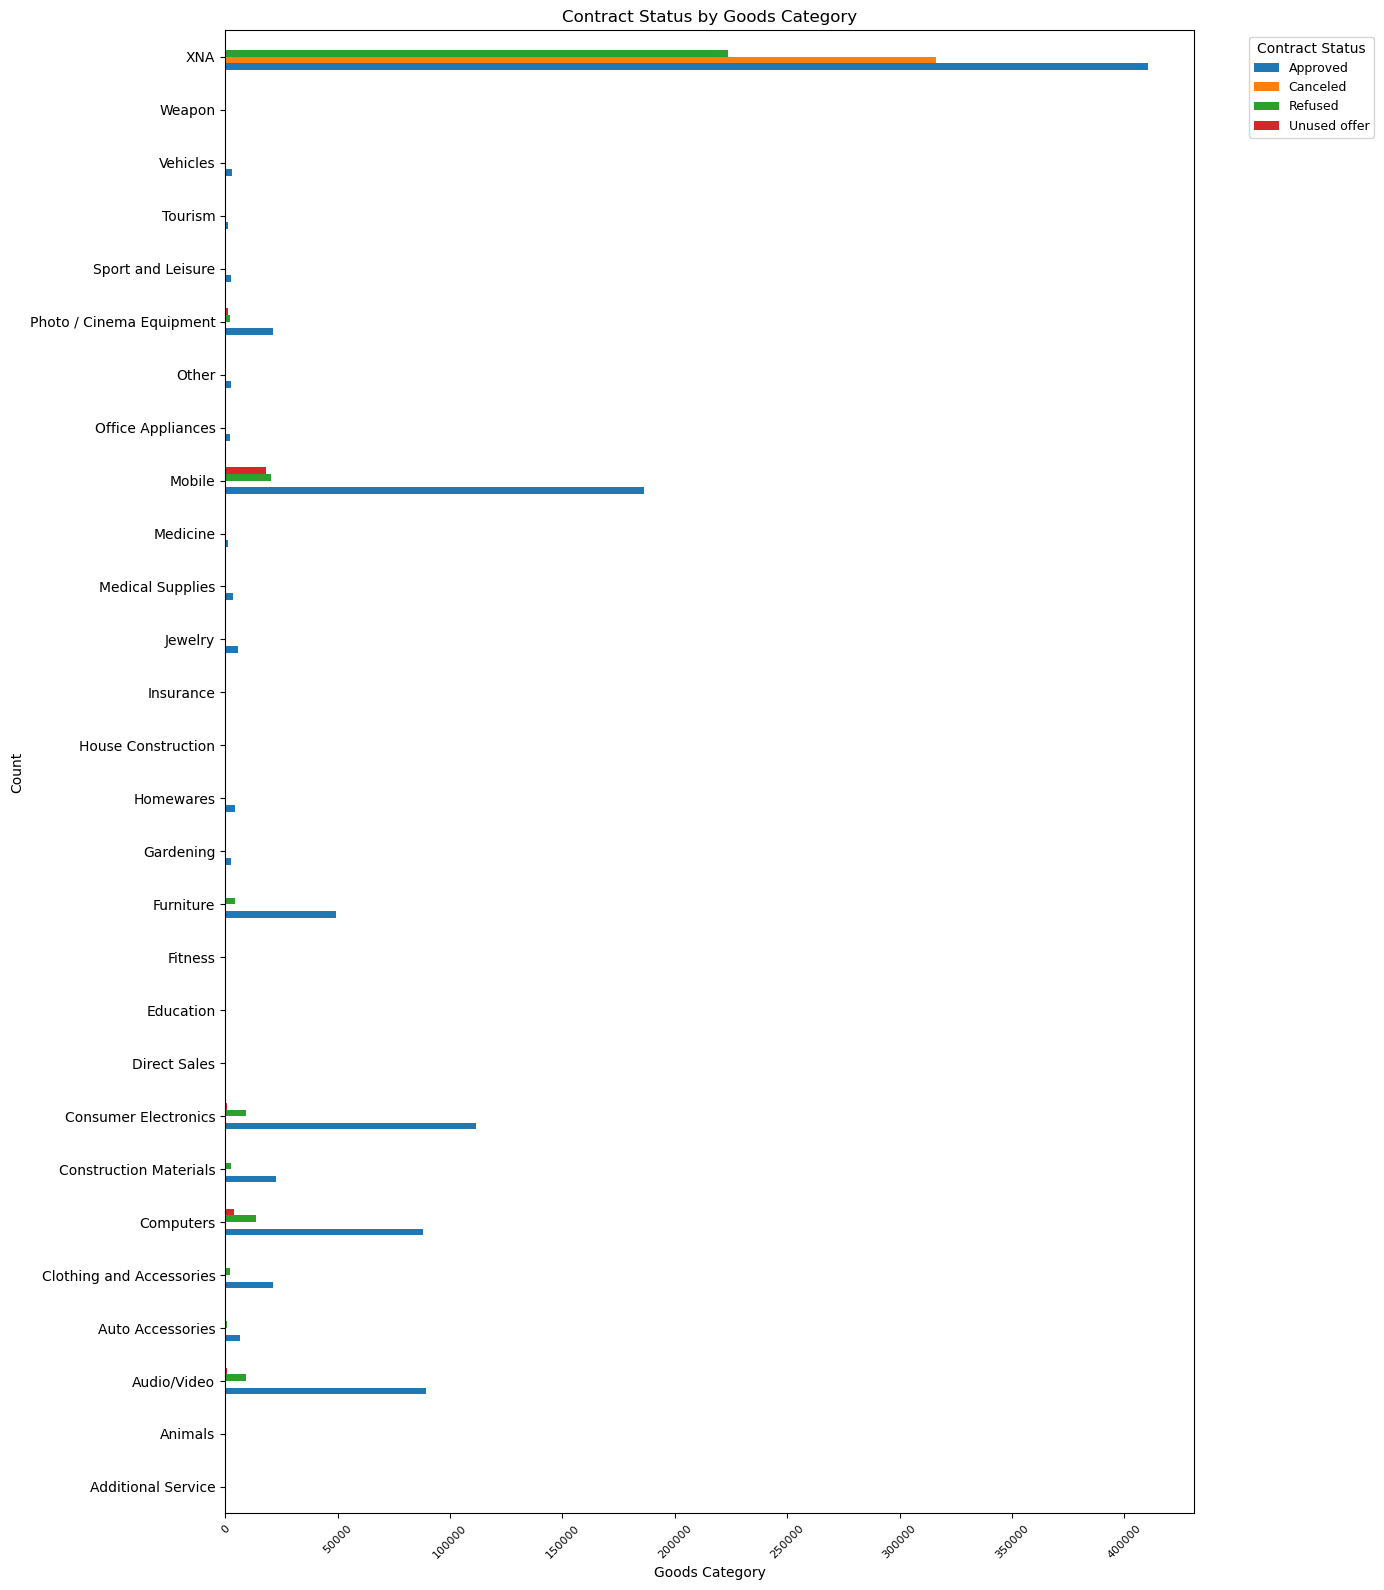

In [32]:
ax = goods_status.plot(kind='barh', figsize=(14, 16))
plt.title('Contract Status by Goods Category', fontsize=12) 
plt.xlabel('Goods Category', fontsize=10)  
plt.ylabel('Count', fontsize=10) 
plt.xticks(rotation=45, fontsize=8)  

plt.legend(title='Contract Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()  
plt.show()

- The analysis reveals that "Mobile" (186,174) and "Computers" (88,050) have the highest approval counts, indicating strong demand in technology-related products.
-  Categories like "Audio/Video" (9,080 refusals) and "Computers" (13,534 refusals) face significant challenges in meeting approval criteria.
-  "XNA" shows a high cancellation rate (316,107), suggesting potential issues that need addressing.


#### Average Application amount and Average Credit Amount

In [153]:
average_application_amount = previous_application_data['AMT_APPLICATION'].mean()
average_credit_amount = previous_application_data['AMT_CREDIT'].mean()
print(f"Average Application Amount: {average_application_amount:.2f}")
print(f"Average Credit Amount: {average_credit_amount:.2f}")

Average Application Amount: 175233.86
Average Credit Amount: 196113.90


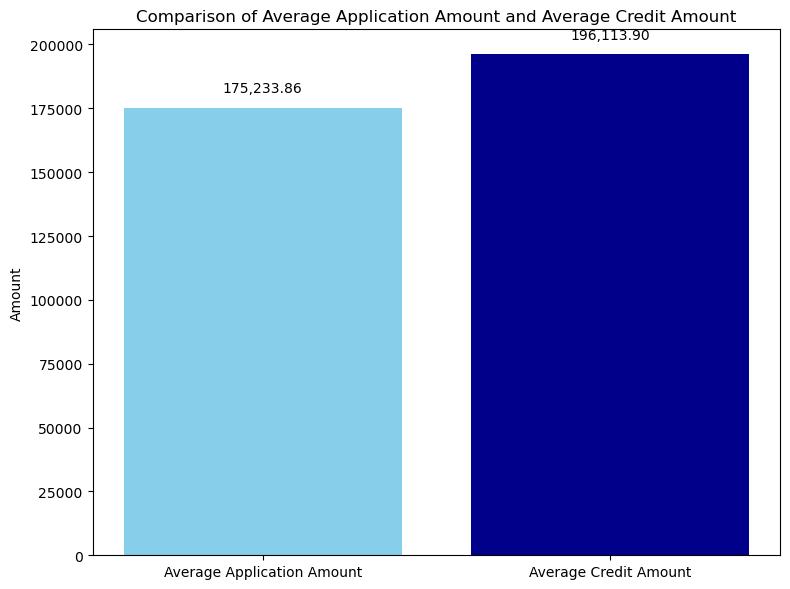

In [156]:
average_values = pd.DataFrame({
    'Amount Type': ['Average Application Amount', 'Average Credit Amount'],
    'Amount': [average_application_amount, average_credit_amount]
})
plt.figure(figsize=(8, 6))
plt.bar(average_values['Amount Type'], average_values['Amount'], color=['skyblue', 'darkblue'])
plt.title('Comparison of Average Application Amount and Average Credit Amount')
plt.ylabel('Amount')

for i, value in enumerate(average_values['Amount']):
    plt.text(i, value + 5000, f'{value:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


- The average application amount is 175,233.86, while the average credit amount is higher at 196,113.90.
- This discrepancy suggests that people are often asking for more money than they apply for, which could show that they feel confident about getting approved or that they need more funding than they originally requested.
